<a href="https://colab.research.google.com/github/dhazari/PersonalityClassification/blob/main/BPD_word_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOADING IN DATA

In [12]:
#First we parse through files I have stored to extract information.
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [13]:
#Imports to create a dataframe with files to be parsed
import pandas as pd
import os

#name of dataframe. stored with columns: {Journal name, Year, Title, file_path, text, Word Frequency, Word Correlations, Classification}
overall_data = pd.DataFrame(columns=['Journal name', 'Year', 'Title', 'file_path', 'Keywords', 'text', 'Acronyms','Sequences', 'lengths','correlations', 'Classification'])

In [14]:
pip install PyPDF2

##HELPFER FUNCTIONS TO PARSE JOURNALS

In [15]:
#Code for parsing PDFs
import PyPDF2

def read_pdf(file_path):
    with open(file_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text


In [16]:
pip install beautifulsoup4

In [17]:
from bs4 import BeautifulSoup
import unicodedata

#Code for parsing HTML files
def read_html(file_path):
  with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    text = soup.get_text()
    #Remove hidden characters
    text = unicodedata.normalize('NFKC', text)
    return text

##LOADING IN DATA BY PARSING THROUGH PATHS

In [18]:
#Parse through all folders till a file is reached
def find_files(filepath,file_types):

  #Creating a list that returns all filepaths
  all_files = []

  #os.walk goes through each file and each directory. recursively joins all
  for root,dirs,files in os.walk(filepath):
    for file in files:
      if any(file.endswith(ft) for ft in file_types):
        all_files.append(os.path.join(root,file))

  return all_files

In [19]:
#Parse through the filepath to give the Name of the Journal, Year, and title.
#Looks like: /content/drive/MyDrive/PBProject/Journal/Year/Title.ext
def break_path(filepath):
  components = filepath.split('/')
  journal_name = components[-3]
  year = components[-2]
  title = components[-1].replace('.pdf', '').replace('.html', '')
  return journal_name, year, title

In [20]:
#Parsing files. Stored In a manner of Journal Name(folders), years(folders), journals (pdf OR html)
file_path = '/content/drive/MyDrive/BPProject/'
file_types = ['.html', '.pdf']

#First get all files in the PBProject
file_paths = find_files(file_path, file_types)
#Now save each!
for filepath in file_paths:
  journal_name, year, title = break_path(filepath)

  #Now read text
  text = ''
  if filepath.endswith('.pdf'):
    text = read_pdf(filepath)
  elif filepath.endswith('.html'):
    text = read_html(filepath)
  else:
    continue

  #Store in dataframe
  overall_data.loc[len(overall_data)] = [journal_name, year, title, filepath, '' , text, '','','', '','']

overall_data = overall_data.drop_duplicates()
overall_data

,Journal name,Year,Title,file_path,Keywords,text,Acronyms,Sequences,lengths,correlations,Classification
0,"Personality Disorders: Theory, Research, and T...",2009,Evidence-based assessment of personality disor...,/content/drive/MyDrive/BPProject/Personality D...,,Evidence-Based Assessment of Personality Disor...,,,,,
1,"Personality Disorders: Theory, Research, and T...",2009,A Dimensional Model of Personality Disorder In...,/content/drive/MyDrive/BPProject/Personality D...,,A Dimensional Model of Personality Disorder: I...,,,,,
2,"Personality Disorders: Theory, Research, and T...",2009,Early Temperamental and Psychophysiological Pr...,/content/drive/MyDrive/BPProject/Personality D...,,Early Temperamental and Psychophysiological Pr...,,,,,
3,"Personality Disorders: Theory, Research, and T...",2009,Differential Impairment as an Indicator of Sex...,/content/drive/MyDrive/BPProject/Personality D...,,\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,,,,
4,"Personality Disorders: Theory, Research, and T...",2009,Differential Impairment as an Indicator of Sex...,/content/drive/MyDrive/BPProject/Personality D...,,Understanding the Role of Impulsivity and Exte...,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
418,"Personality Disorders: Theory, Research, and T...",2025,Investigating empathy in schizotypy,/content/drive/MyDrive/BPProject/Personality D...,,\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,,,,
419,"Personality Disorders: Theory, Research, and T...",2025,"The urge to fill the void Emptiness, impulsivi...",/content/drive/MyDrive/BPProject/Personality D...,,\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,,,,
420,"Personality Disorders: Theory, Research, and T...",2025,Daily loneliness and suicidal ideation in bord...,/content/drive/MyDrive/BPProject/Personality D...,,\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,,,,
421,"Personality Disorders: Theory, Research, and T...",2025,Elemental psychopathy assessment’s nomological...,/content/drive/MyDrive/BPProject/Personality D...,,\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,,,,


In [21]:
pip install wordninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=79c21f5b69843b31b85dd3b9b0acda32c833af3bc7baab7b9efcb22e8c1885f0
  Stored in directory: /root/.cache/pip/wheels/e6/66/9c/712044a983337f5d44f90abcd244bd4b8ad28ee64750404b50
Successfully built wordninja


In [22]:
pip install nltk

#STARTING TO FIND SEQUENCES AND ASSOCIATIONS

##FINDING KEYWORDS, AKA journals have a "keywords: ..." Line

In [23]:
#FIND THE KEYWORDS
import re

def find_keywords(text):
  # Extract the keywords using regex
  match = re.search(r"Keywords:\s*([^\n\t]+)", text)
  if match:
      keywords_string = match.group(1)
      keywords_list = [k.strip().lower() for k in keywords_string.split(',')]
      for i,value in enumerate(keywords_list):
        if "abstract" in value.lower():
          keywords_list[i] = keywords_list[-1].split("abstract")[0]
          keywords_list = keywords_list[:i]
          return keywords_list
      return keywords_list
  else:
      return []

##Fundtion to parse and then CLEAN parsed terms!

In [24]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 35.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [25]:
import nltk
from nltk.corpus import words
import wordninja

#Only  download this once
nltk.download('words')

def smart_parse(text):
  """
    We want to ensure all terms are clean.
    - We noticed at times there are random "h"s appended
    - Some of the word or removed spaces
    - LEMMENTIZE

    Parameters:
    - text: The list of words

    Returns:
    - Cleaned up version of tokenized list
  """

  nlp = spacy.load("en_core_web_sm")

  def replace_with_lemmas(word_list):
      # Create a Doc object
      doc = nlp(" ".join(word_list))
      # Replace each word with its lemma
      lemmatized_list = [token.lemma_ for token in doc]
      return lemmatized_list

  replaced_words = replace_with_lemmas(text)

  word_list = set(words.words())

  final_words = []

  for i,term in enumerate(replaced_words):

    if term.lower() in word_list:
      #We change to lower case! To ensure it is found
      final_words.append(term.lower())
      continue

    #Is it an acronym?
    if term.isupper():
      final_words.append(term)
      continue

    #Now we have found outliers...
    term = term.lower()

    ##Clean the weird typographic terms
    cleaned = term.replace("ﬁ", "fi").replace("ﬀ", "ff")  # Fix typographic ligatures

    #We have some random "h"'s scattered
    if cleaned.startswith("h") and len(cleaned) > 1:
      without_h = cleaned[1:]
      if without_h in word_list:
        final_words.append(without_h)
        continue
      if all(w in word_list for w in wordninja.split(without_h)):
        final_words.extend(wordninja.split(without_h))
        continue

    #We have some random "h"'s scattered
    if cleaned.endswith("h") and len(cleaned) > 1:
      without_h = cleaned[:-1]
      if without_h in word_list:
        final_words.append(without_h)
        continue
      if all(w in word_list for w in wordninja.split(without_h)):
        final_words.extend(wordninja.split(without_h))
        continue

    #Split the term
    split = wordninja.split(cleaned)
    if all(w in word_list for w in split):
      final_words.extend(split)
    else:
      #print(f"Was unable to identify {cleaned}")
      final_words.append(cleaned)

  return final_words

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [26]:
import re

def tokenizer(text,disinclude, isTitle = False):

  #remove extraneous grammar and digits
  text= re.sub(r'\b\w\b|[^\w\s]', '', text)
  text= re.sub(r'[\d]', '', text)
  #Remove hidden characters
  text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)

  #Split the text into individual words
  input_list = text.split()
  input_list = smart_parse(input_list)

  #CLEAN UP input list by removing unecessary words
  input_list = [word for word in input_list if word not in disinclude]

  return input_list

##FIND THE SEQUENCES/PHRASES ALONGSIDE LENGTHS OF TERM. PERFORMS SEQUENTIAL DATA MINING

In [27]:
#Finds frequencies between text and word - aka does it exist in order and how often does it show?
def find_frequencies_count(text, word_pattern):

  """
    We want to find occurence of the PATTERN and count that, ensuring order

    Parameters:
    - text: The list of words
    - word_pattern: The sequence of words to find both IN ORDER and WITHIN ORDER

    Returns:
    - count of frequent sequences of the given sequence
    """

  #First we loop through ALL text
  counter = 0
  word_index = 0
  found_index = 0
  for index, text_word in enumerate(text):
    #Get the word to find
    target_item = word_pattern[word_index]
    #First find occurance
    if text_word == target_item:
      #We must make sure all words are in conjunction. if not, RESET and move on
      if word_index != 0 and index !=found_index+1:
        word_index = 0
        found_index = 0
        continue
      #If it is sequential, increment found_index as well as the word to find
      else:
        found_index = index
        word_index+=1
      #If we reach the end, we implement by 1 and reset
      if word_index == len(word_pattern):
        counter+=1
        word_index = 0

  return counter

In [28]:
from collections import Counter
from itertools import combinations

#First step: starting with all the text! then sending into frequencies as an entire dictionary of transactions(AKA overall texts) and frequencies (Of word and phrases)
def parse_for_mining(text, disinclude, min_sup_percentage):

  """
    Parses and cleans ALL initial text and returns a dictionary of frequencies
    for round 1 of sequential data mining before sending into a recurssive algorithm

    Parameters:
    - text: The text
    - disinclude: mscellaneous words
    - min_sup_percentage: the PERCENTAGE we want a value to appear in a text to be considered frequent

    Returns:
    - FULL list of frequent sequences of words that reach min_sup, for all lengths of words
    """

  #CLEAN UP input list by removing unecessary words
  input_list = tokenizer(text, disinclude)

  #Calculate the min_sup threshold in numerical values
  total_words = len(input_list)
  min_sup = int(min_sup_percentage * total_words)
  if min_sup == 1:
    min_sup = 2
  print(f"Min_sup is {min_sup}")
  print(f"Total words is {total_words}")

  #Sequential pattern mining
  #Step 1: We need to generate a list with frequencies of length k that fall under the limit of min_sup
  input_dict = dict(Counter(input_list))
  min_sup_dict = {k: v for k, v in input_dict.items() if v >= min_sup}
  min_sup_list = list(set(min_sup_dict.keys()))

  final_list = []
  #We send in input_list as og_text as it contains all words in order that we want to find!
  frequencies(min_sup_list, 1, min_sup, final_list, input_list)

  return final_list

#Finds words most often Grouped Together via SEQUENTIAL DATA MINING - TODO
def frequencies(C_Lk, k, min_sup, final_sequence, og_text):

  """
    Performes sequential data mining to find frequent sequences of words

    Parameters:
    - C_Lk: Cnadidates length k, The list of frequent sequences for the kth value, provided as a list containing tuples
    - k: what length are we  determining is frequent enough?
    - min_sup: cut off value for what is considered "Frequent"
    - final_sequence: FINAL list of frequent sequences of words
    -og_text: The original list of words in order

    Returns:
    - FULL list of frequent sequences of words that reach min_sup, for all lengths of words
    """

  #Now generate all possible combinations of length k+1
  #If k = 1, we simply generate and combination list of length 2
  C_k2 = list(combinations(C_Lk, 2))
  #Otherwise, we continue on to combine these above created combos to generate a list of possible sequences
    #check if dropping the FIRST value in any item is the same as dropping the LAST item. If yes, then we JOIN
  if k>1:
    #First drop all tuples and turn into a cohesive list
    test_next = []
    for item in C_k2:
      #Contains a PAIR of values!
      item1 = item[0]
      item2 = item[1]
      if item1[1:] == item2[:-1]:
        test_next.append((item1[0],) + item2)
      #If does NOT fulfill, add both items as final sequences as they still fulfill the requirements
      else:
        final_sequence.append({"term": ' '.join(item1), "length": find_frequencies_count(og_text,item1)})
        final_sequence.append({"term": ' '.join(item2), "length": find_frequencies_count(og_text,item2)})
    C_k2 = test_next

  #CHECK FREQUENCIES of combos!!!
  input_dict = {}
  for words in C_k2:
    input_dict[words] = find_frequencies_count(og_text,words)
    #print(f"found {words}: {input_dict[words]}")

  #Now calculate which fall under the approriate min_sup
  min_sup_dict = {k: v for k, v in input_dict.items() if v >= min_sup}
  min_sup_list = list(min_sup_dict.keys())

  #If less than combo, we know that they still fill the min_sup threshold, so we wish to add only those values as frequent
  fails_min_sup_dict = {k: v for k, v in input_dict.items() if v < min_sup}
  fails_min_sup_list = list(fails_min_sup_dict.keys())
  flattened_list = []
  #IF the k+1 fails, then we append the k values as finals!
  for item in fails_min_sup_list:
    flattened_list.append(item[:-1])
    flattened_list.append(item[1:])

  flattened_list = list(set(flattened_list))
  flattened_list_return = []
  for term in flattened_list:
    flattened_list_return.append({"term": ' '.join(term), "length": find_frequencies_count(og_text,term)})

  #Add the flattened list to the frequent_sequences list since those are final values ALONGSIDE counts
  final_sequence.extend(flattened_list_return)

  #If no frequent words are created in the new combination list, we return frequent sequences as is
  if not min_sup_list:
    return final_sequence

  #Otherwise RECURSE to the next length! min_sup_list will be used to generate candidates of k+1 length
  #REDUCE the min_sup amount by 0.15, because we get fewer words each time. HOWEVER, length CANNOT be just 0.
  min_sup = int(min_sup*0.5)
  if min_sup == 0:
    min_sup = 1

  frequencies(min_sup_list, k+1, min_sup, final_sequence, og_text)

##ENSURES THAT AFTER FINDING PHRASES< SUBSETS ARE ELIMINATED

In [29]:
#Now remove duplicates!
#Now we go through each question!
def remove_duplicates(organize):

    remove = []

    #Since we are unaware of how it enters, we must find and limit all values
    for pairings in list(combinations(organize,2)):
        # Split both current key and existing phrase into words
        pairings_1 = set(pairings[0].split(" "))
        pairings_2 = set(pairings[1].split(" "))

        # Check if the either key's words are a subset of any existing phrase
        if pairings_1.issubset(pairings_2):
            # If all words in key are present in the existing phrase, add to list to remove
            remove.append(pairings[0])
        elif pairings_2.issubset(pairings_1):
            remove.append(pairings[1])

    remove = list(set(remove))

    return remove

##GRAPH THE TOP 50 SEQUENCES THAT APPEAR

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def graph_sequences(overall_data):

  # Step 1: Flatten sequences
  all_terms = []

  for row in overall_data["lengths"]:
      for item in row:
          all_terms.append((item["term"], item["length"]))

  # Step 2: Create DataFrame
  terms_df = pd.DataFrame(all_terms, columns=["term", "length"])

  # Step 3: Group by term and sum amounts
  term_counts = terms_df.groupby("term")["length"].sum().sort_values(ascending=False)

  # Step 4: Choose Top N
  top_n = 50  # You can change this
  top_terms = term_counts.head(top_n)

  # Step 5: Plot
  plt.figure(figsize=(15, 6))
  top_terms.plot(kind='bar', color='steelblue')

  plt.yscale('log')  # Apply log scale to Y axis
  plt.title(f'Top {top_n} Sequences by Total Amount (Log Scale)')
  plt.xlabel('Sequence Term')
  plt.ylabel('Total Amount (Log Scale)')
  plt.xticks(rotation=90)
  plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
  plt.tight_layout()
  plt.show()


##CALLING FUNCTIONS TO FIND SEQUENCES AFTER DEFINING WORDS TO EXCLUDE

In [31]:
from nltk.corpus import stopwords

#Words we do not want
nltk.download('stopwords')
update_terms = [
    "vs", "would", "may", "well", "new york", "community", "jr", "toronto", "american", "agenda", "use", "based",
    "forth", "lower scoring", "higher scoring group", "early", "high", "type", "full", "standard", "revealed",
    "IQ", "review", "based", "hand", "step", "relatively", "membership", "groups", "lack", "whether", "calculated",
    "variance", "average", "problems", "see", "similar", "level", "specific", "item", "fi", "possible", "persons",
    "st", "data", "effect", "repeated", "population", "taken", "reﬂect", "new", "life", "scores", "interaction",
    "cues", "amplitudes", "total", "baseline", "k", "significantly", "orienting", "ranging", "less", "levels", "later",
    "figure", "left", "table", "finding", "details", "exist", "age years", "times", "evidence", "controls",
    "contrary", "could", "predict", "right", "toward", "non", "shown", "low", "sample", "rated point",
    "longer SC", "mean", "note", "four", "first", "recorded", "higher scoring", "responses", "components",
    "initial", "rest", "future", "brain", "amplitude", "correlations", "results", "measure", "prior",
    "mu", "university", "affairs medical", "department", "friends", "work", "washington DC", "system",
    "social", "zo", "table", "important", "chi", "minnesotatwin", "th", "press", "sample", "completed", "first", "better",
    "fit", "future","san", "press", "vol", "document", "ready", "example", "number", "amount", "different", "including",
    "based", "use", "items", "include", "provided", "questions", "general", "perhaps", "existing", "course", "changes", "future",
    "time", "issue", "fact", "yet","without", "thus", "treatement", "function", "demonstrated", "rating", "conducted", "specifically",
    "journal", "de","hoc","classification","present","found","tested","school", "term","found","finally","however","although",
    "within","also","one","two","assesment","study","studies","h","et","al","research","used","using","test","participants",
    "de","hoc","either", "scale","validity","three","support","ed", 'presented', 'reported', 'early', 'various', 'part', 'high',
    'included', 'female', 'american', 'hypothesis', 'correlated', 'variables', 'latent', 'correlation', 'regression', 'heterogeneity', 'measurement', 'criterion', 'index'
    'type', 'strongly', 'revealed', 'problem', 'basis', 'information', 'previous', 'review', 'fourth',
    'based', 'gender group', 'tendency', 'different', 'difficulty', 'groups', 'difference', 'whether',
    'facet', 'self', 'n', 'likely', 'problems', 'sub', 'similar', 'manual', 'level', 'differ', 'higher',
    'forms', 'age', 'given', 'fact', 'differed', 'total', 'score', 'significantly', 'less', 'levels',
    'affect', 'consistent', 'determine', 'created', 'least', 'separate', 'including', 'important',
    'post tests', 'times', 'control group', 'current', 'rather', 'means', 'role', 'existence', 'measures',
    'low', 'suggest', 'sample', 'combined', 'model', 'many', 'II', 'described', 'note', 'effect group',
    'individuals', 'individual', 'four', 'differences', 'time', 'expected', 'factor', 'first',
    'presence', 'measured', 'indicated', 'respectively', 'relation', 'alpha', 'v', 'non significant',
    'main', 'men women', 'b', 'aa group', 'analyses', 'among', 'correlations', 'results',
    'measure', 'addition', "trait", "traits","utility","related","section","comment","commentary","meta",'adolescents', 'adolescence',
    'adolescent',"feature","features","zing",'longitudinal', 'specifier', 'across','satisfaction','experience','r','HTML',
    'paragraph','useful','jan','subjects', 'response', 'feedback','article', 'title', 'link', 'content', 'page','additional','like',
    'year', 'daily','sizes', 'pittsburgh','rated', 'assigned', 'per','outcomes', 'intervention', 'outcome', 'interventions', 'trials', 'clinicians', 'experiences','program',
    'clinician', 'primary', 'criteria', 'proposed', 'followup','correction', 'authors', 'categories', 'people', 'publication','words','bom','gratz','associated', 'partners',
    'group', 'partner', 'method', 'methods','chapman', 'samuel', 'wright', 'III', 'cooke', 'miller', 'patrick', 'concept', 'approach', 'empirical', 'approaches','task', 'tasks',
    'domain', 'domains','c', 'f', 'p', 'pi','paste','copyright','newman','person','select file', 'file','network','images','gunderson','might',
    'go', 'day','cross', 'axis', 'dimensions','frick','ratings', 'processes', 'structure', 'factors', 'risk', 'symptoms', 'clinical', 'assessment']
disinclude = list(stopwords.words('english'))
characters_to_remove = ["#", "@", "$", "!", '.', '&', '(', '=']
disinclude = disinclude + characters_to_remove + update_terms

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


INCREASE TO 0.007

Min_sup is 28
Total words is 4028
[{'term': 'interview', 'length': 94}, {'term': 'provide', 'length': 38}, {'term': 'inventory', 'length': 40}, {'term': 'report', 'length': 53}, {'term': 'widiger', 'length': 34}, {'term': 'diagnostic', 'length': 45}, {'term': 'semi', 'length': 64}, {'term': 'personality', 'length': 226}, {'term': 'e', 'length': 29}, {'term': 'disorder', 'length': 162}]
['interview', 'personality', 'disorder', 'semi', 'report', 'inventory', 'diagnostic', 'widiger', 'e', 'provide']
10
Min_sup is 13
Total words is 1955
[{'term': 'disorder', 'length': 55}, {'term': 'schizophrenia', 'length': 16}, {'term': 'perceptual', 'length': 15}, {'term': 'relative', 'length': 16}, {'term': 'dimensional', 'length': 32}, {'term': 'questionnaire', 'length': 13}, {'term': 'pathology', 'length': 29}, {'term': 'widiger', 'length': 23}, {'term': 'e', 'length': 18}, {'term': 'personality', 'length': 88}, {'term': 'livesley', 'length': 13}, {'term': 'five', 'length': 18}, {'term': 'characteris

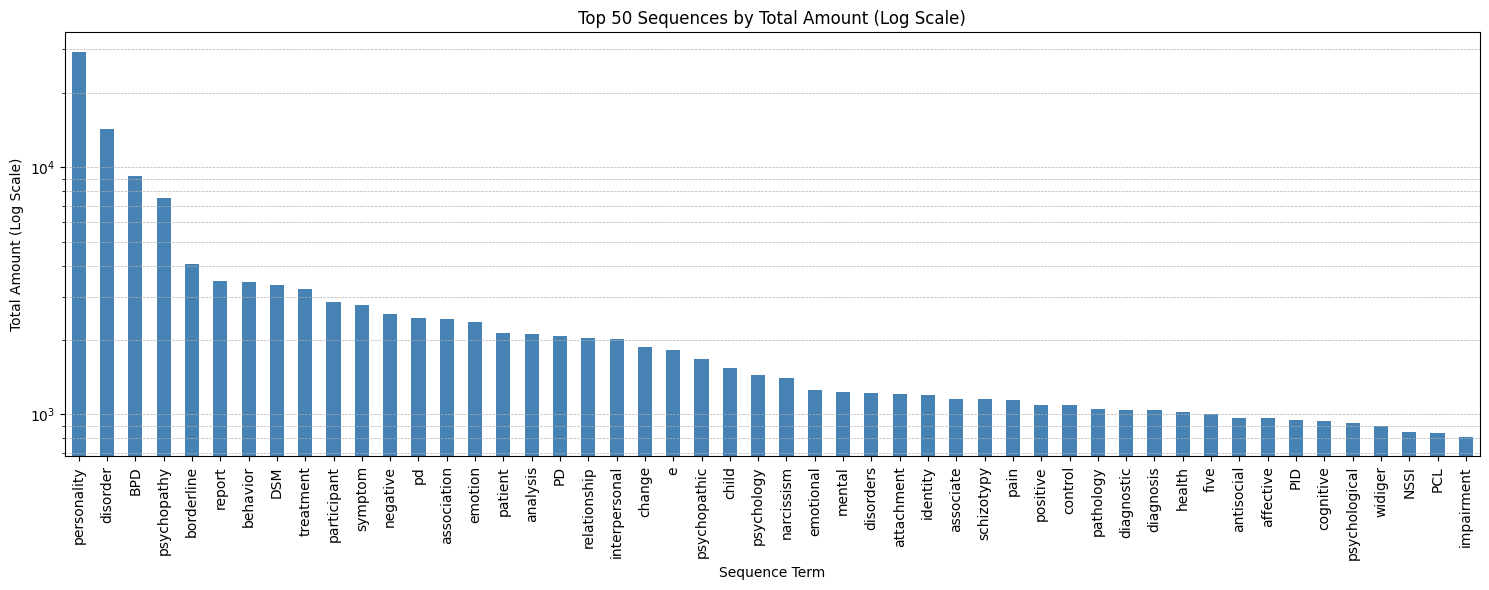

,Journal name,Year,Title,file_path,Keywords,text,Acronyms,Sequences,lengths,correlations,Classification
0,"Personality Disorders: Theory, Research, and T...",2009,Evidence-based assessment of personality disor...,/content/drive/MyDrive/BPProject/Personality D...,[],Evidence-Based Assessment of Personality Disor...,,"[interview, personality, disorder, semi, repor...","[{'term': 'interview', 'length': 94}, {'term':...",,
1,"Personality Disorders: Theory, Research, and T...",2009,A Dimensional Model of Personality Disorder In...,/content/drive/MyDrive/BPProject/Personality D...,"[personality pathology, dsm–v, dimensional mod...",A Dimensional Model of Personality Disorder: I...,,"[pathology, dimensional, questionnaire, person...","[{'term': 'disorder', 'length': 55}, {'term': ...",,
2,"Personality Disorders: Theory, Research, and T...",2009,Early Temperamental and Psychophysiological Pr...,/content/drive/MyDrive/BPProject/Personality D...,"[psychopathy, childhood, temperament, skin con...",Early Temperamental and Psychophysiological Pr...,,"[temperament, recovery, psychopathy, child, st...","[{'term': 'child', 'length': 33}, {'term': 'ra...",,
3,"Personality Disorders: Theory, Research, and T...",2009,Differential Impairment as an Indicator of Sex...,/content/drive/MyDrive/BPProject/Personality D...,"[sex bias, personality disorder, diagnosis, ds...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[diagnosis, disorders, gender, bias, disorder,...","[{'term': 'gender', 'length': 20}, {'term': 'b...",,
4,"Personality Disorders: Theory, Research, and T...",2009,Differential Impairment as an Indicator of Sex...,/content/drive/MyDrive/BPProject/Personality D...,[],Understanding the Role of Impulsivity and Exte...,,"[aa, gender, abuser, control, impulsivity, par...","[{'term': 'gender', 'length': 26}, {'term': 'i...",,
...,...,...,...,...,...,...,...,...,...,...,...
418,"Personality Disorders: Theory, Research, and T...",2025,Investigating empathy in schizotypy,/content/drive/MyDrive/BPProject/Personality D...,"[schizotypy, empathy, schizophrenia, social co...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[associate, empathy, cognitive, affective, pos...","[{'term': 'positive', 'length': 33}, {'term': ...",,
419,"Personality Disorders: Theory, Research, and T...",2025,"The urge to fill the void Emptiness, impulsivi...",/content/drive/MyDrive/BPProject/Personality D...,"[emptiness, mentalizing, impulsivity, borderli...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[BPD, emptiness, association, personality, beh...","[{'term': 'impulsivity', 'length': 95}, {'term...",,
420,"Personality Disorders: Theory, Research, and T...",2025,Daily loneliness and suicidal ideation in bord...,/content/drive/MyDrive/BPProject/Personality D...,"[suicide, loneliness, ambulatory assessment, b...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[BPD, si, borderline, association, personality...","[{'term': 'association', 'length': 45}, {'term...",,
421,"Personality Disorders: Theory, Research, and T...",2025,Elemental psychopathy assessment’s nomological...,/content/drive/MyDrive/BPProject/Personality D...,"[psychopathy, personality, meta-analysis, anta...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[EPA, positive, personality, association, emot...","[{'term': 'lynam', 'length': 79}, {'term': 'em...",,


In [32]:
import spacy

#Now that we have a dataframe, we start on parsing each file of text!
#Step one: Find frequencies of words. Not ONLY singular words, but PHRASES of words.
  #disinclude any words that arent meaningful - still TODO
  #Min sup is currently at 5%

#For each text entry
for i,row in overall_data.iterrows():

  #FIRST find the keywords!!
  overall_data.at[i, 'Keywords'] = find_keywords(row['text'])

  #Send to min sequential patterns
  allFoundFrequents = parse_for_mining(row['text'], disinclude, 0.007)

  #Add this to the LENGTHS
  overall_data.at[i, 'lengths'] = allFoundFrequents

  #EXTRACT term for all! keep seperate
  print(allFoundFrequents)
  allFoundFrequents = [item["term"] for item in allFoundFrequents]

  #Remove any subsets
  remove_item = remove_duplicates(allFoundFrequents)
  if remove_item:
    for item in remove_item:
      allFoundFrequents.remove(item)

  #Assign frequent terms to appropriate entry!
  allFoundFrequents = list(set(allFoundFrequents))
  overall_data.at[i, 'Sequences'] = allFoundFrequents
  print(allFoundFrequents)
  print(len(allFoundFrequents))

graph_sequences(overall_data)
overall_data

###TODO
- May be unecessary, takes too long

In [33]:
#For the next step, we need to clean the frequent word findings in order to cut down on the number of actions needed by apriori
import spacy
from numpy import mean
import wordninja

# Load a medium-sized spaCy model with word vectors
nlp = spacy.load("en_core_web_md")

def filter_by_embedding_informativeness(terms, generic_anchors=None, similarity_threshold=0.5):
    """
    Filters out semantically generic terms based on similarity to anchor generic terms.

    Parameters:
        terms (list of str): The terms to evaluate.
        generic_anchors (list of str): Known generic words to compare against.
        similarity_threshold (float): Cosine similarity threshold. Lower = stricter filtering.

    Returns:
        List[str]: Terms that are more "informative" (i.e., less similar to generic anchors).
    """
    if generic_anchors is None:
        generic_anchors = [
          'latency', 'simply', 'assess', 'record', 'using', 'two', 'verbal', 'information', 'responses',
          'informed', 'current', 'skill', 'hospital', 'count', 'ability', 'suggest', 'interview', 'correlated',
          'link', 'differences', 'table', 'assessment', 'criteria', 'analyses', 'prior', 'investigation',
          'suggested', 'article', 'instructions', 'point', 'computer', 'scores', 'levels', 'without', 'consistent',
          'studies', 'general', 'validity', 'one', 'designed', 'group', 'modified', 'answer',
          'journal', 'sample', 'file', 'given', 'correct', 'betweengroup', 'version', 'suggesting', 'adequate',
          'table', 'min', 'assessed', 'completed', 'future', 'comparison', 'proportion', 'test', 'important', 'used',
          'year', 'small', 'et', 'week', 'findings', 'community', 'manual', 'least', 'less', 'results', 'new', 'times',
          'participants', 'data', 'effect', 'study', 'time', 'measurements', 'group comparisons', 'large', 'comparison',
          'variance', 'number', 'trial', 'sample', 'answer', 'discussed', 'result', 'measures', 'time', 'conditions',
          'aspect', 'consequences', 'session', 'planned', 'moderator', 'model', 'variables', 'conditions', 'block',
          'limit', 'file', 'figure', 'development', 'context', 'number','differ', 'studies'
      ]

    # Prepare vectors
    anchor_vectors = [nlp(word).vector for word in generic_anchors if nlp(word).has_vector]

    def is_informative(term):
        token = nlp(term)
        #If there is no vector, there is a chance that the word may not have been cleaned or diaplsy incorrectly. we can fix that...
        if not token.has_vector:
          print(f"{token} has no vector")
          #Based on what i see, anything that isnt an acronym seems to be a name!
          if term.isupper():
            return True #Keep the acronym!
          return False #Remove the name!
        similarities = [token.similarity(nlp(anchor)) for anchor in generic_anchors]
        avg_similarity = mean(similarities)
        return avg_similarity < similarity_threshold

    return [term for term in terms if is_informative(term)]

#for i,row in overall_data.iterrows():
#  row["Sequences"] = filter_by_embedding_informativeness(row["Sequences"], generic_anchors = disinclude)
#  print(row["Sequences"])
#  print(len(row["Sequences"]))

#overall_data


#ASSOCIATION RULE MINING TO FIND IMPORTANT ASSOCIATIONS.
- min_support is the fraction of transactions that must contain the itemset.
- A high min_support will give you fewer, more common patterns.
- A low min_support finds rarer patterns, but may result in noise or high computation time.
- this assists with classification of text, because we create universal rule sets to pull data from. Otherwise we would have inifinite sets.

In [34]:
pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.7 MB/s eta 0:00:00


In [35]:
from rapidfuzz import fuzz, process

#FIRST I want to find the key terms appearing across title:
# Concatenate the column with spaces
concatenated_string = ' '.join(overall_data['Title'].astype(str).tolist())
#NOW find the terms that appear frequently (at least 0.002 times)
allFoundTitleTerms = parse_for_mining(concatenated_string, disinclude, 0.002)

allFoundTitleTerms = [item["term"] for item in allFoundTitleTerms]

transactions = []
antecedents_list = []
for i,row in overall_data.iterrows():

  #CHECK if any substring of the title is apart of the frequent list
  threshold = 70
  input_list = []

  for phrase in allFoundTitleTerms:
    score = fuzz.partial_ratio(phrase.lower(), row["Title"].lower())
    if score >= threshold:
      if phrase not in input_list:
        input_list.append(phrase)

  #Now create the list of antecedents we want for each item
  antecedents_list.append(input_list + row["Keywords"])
  print(antecedents_list[i])
  #UPDATE keywords
  row["Keywords"] = antecedents_list[i]
  # Combine title, keywords, and frequent terms into one transaction
  transaction = list(set(antecedents_list[i] + row["Sequences"]))
  #Append to overall list
  transactions.append(transaction)

# Create one-hot encoded dataframe
all_items = sorted(set().union(*transactions))
df = pd.DataFrame([{item: (item in t) for item in all_items} for t in transactions])
df


Min_sup is 5
Total words is 2991
['base', 'personality', 'e', 'disorders', 'disorder', 'avoidant personality', 'disorder DSM', 'disorder personality', 'DSM personality']
['patient', 'personality', 'DSMIV', 'e', 'borderline', 'disorders', 'report', 'dimensional', 'pain', 'DSM', 'disorder', 'avoidant personality', 'disorder DSM', 'disorder personality', 'DSM personality', 'personality pathology', 'dsm–v', 'dimensional models', 'ﬁve-factor model', 'schizotypal']
['mental', 'impairment', 'psychopathology', 'adult', 'e', 'psychopathy', 'psychopathic', 'pathological', 'psychological', 'capture', 'psychopathy', 'childhood', 'temperament', 'skin conductance', 'arousal']
['mental', 'compare', 'impairment', 'harm', 'base', 'patient', 'personality', 'DSMIV', 'e', 'differential', 'disorders', 'pain', 'DSM', 'disorder', 'sex', 'disorder DSM', 'disorder personality', 'DSM personality', 'sex bias', 'personality disorder', 'diagnosis', 'dsm iv', 'diagnostic criteria']
['mental', 'compare', 'impairment

,,AAQII,AB,ABCD,ADHD,AGGR,AIC,AIDA,AMPD,ANS,...,youth,youth psychopathology,z,zanarini,zeiglerhill reid,zeiglerhill reid meloy,zimmerman,zimmermann,ΔR,ﬁve-factor model
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##PLOTS for association. Heatmaps and directed graphs

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_creation(rules, top_n = 50):

  # Sort rules by confidence (or lift, or other metric)
  rules_sorted = rules.sort_values(by='lift', ascending=False).head(top_n)

  # Create an empty dataframe for heatmap
  terms = list(set(rules_sorted['antecedents'].explode()) | set(rules_sorted['consequents'].explode()))
  matrix = pd.DataFrame(index=terms, columns=terms)

  # Fill the matrix with confidence values
  for idx, row in rules_sorted.iterrows():
      for ant in row['antecedents']:
          for con in row['consequents']:
              matrix.at[ant, con] = row['confidence']

  # Replace NaN with 0 for visualization
  matrix = matrix.fillna(0)

  # Plot using seaborn
  plt.figure(figsize=(12, 10))
  sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5)

  plt.title('Association Rules Confidence Heatmap', fontsize=16)
  plt.xlabel('Consequent')
  plt.ylabel('Antecedent')
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.show()

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

def directedGraph(rules, top_n=50):

  # Sort rules by confidence (or lift, or other metric)
  rules_sorted = rules.sort_values(by='lift', ascending=False).head(top_n)

  # Create directed graph
  G = nx.DiGraph()

  # Add nodes and edges from rules
  for idx, row in rules_sorted.iterrows():
      antecedents = list(row['antecedents'])
      consequents = list(row['consequents'])
      confidence = row['confidence']

      for ant in antecedents:
          for con in consequents:
              G.add_edge(ant, con, weight=confidence)

  # Draw the network
  plt.figure(figsize=(12, 8))

  # Position nodes using spring layout
  pos = nx.spring_layout(G, k=0.5)

  # Draw nodes and edges
  edges = G.edges(data=True)
  weights = [d['weight']*5 for (u, v, d) in edges]  # Scale weights to make them visible

  nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
  nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7, arrows=True)
  nx.draw_networkx_labels(G, pos, font_size=10)

  plt.title("Association Rules Network")
  plt.axis('off')
  plt.show()

##FIND RULES AND ADD CLASSIFICATION

           antecedents             consequents  antecedent support  \
0               (AMPD)              (disorder)            0.061466   
1               (AMPD)                     (e)            0.061466   
2               (AMPD)           (personality)            0.061466   
3                (BPD)       (DSM personality)            0.283688   
4                (BPD)  (avoidant personality)            0.283688   
..                 ...                     ...                 ...   
475  (psychopathology)          (psychopathic)            0.212766   
476      (psychopathy)          (psychopathic)            0.212766   
477     (psychopathic)           (psychopathy)            0.203310   
478      (psychopathy)       (psychopathology)            0.212766   
479  (psychopathology)           (psychopathy)            0.212766   

     consequent support   support  confidence      lift  representativity  \
0              0.765957  0.061466    1.000000  1.305556               1.0   
1    

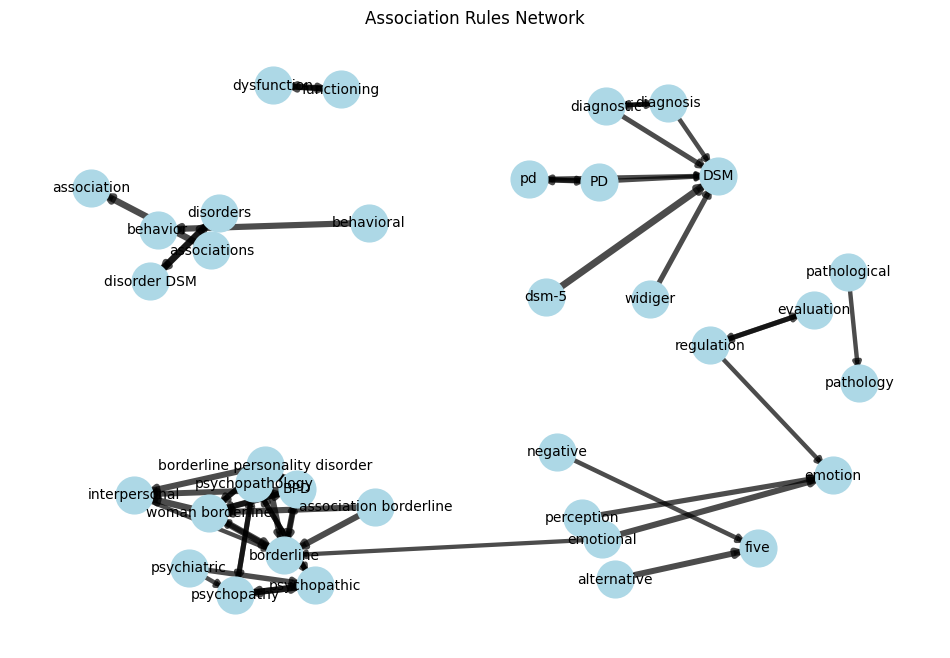

<ipython-input-36-3a2ac1b37108>:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix = matrix.fillna(0)


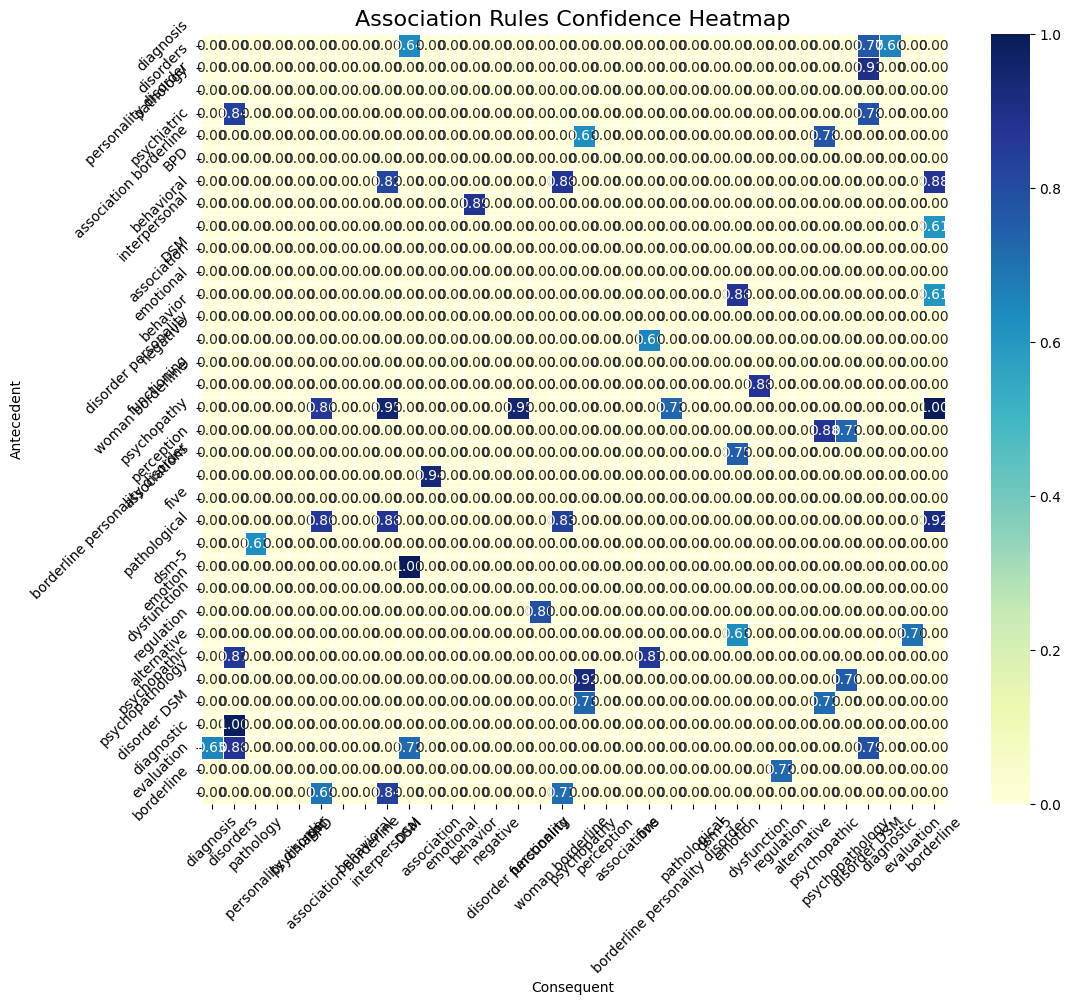

Title: Evidence-based assessment of personality disorders.
Keywords: ['base', 'personality', 'e', 'disorders', 'disorder', 'avoidant personality', 'disorder DSM', 'disorder personality', 'DSM personality']
Sequences: ['interview', 'personality', 'disorder', 'semi', 'report', 'inventory', 'diagnostic', 'widiger', 'e', 'provide']
Lengths: [{'term': 'interview', 'length': 94}, {'term': 'provide', 'length': 38}, {'term': 'inventory', 'length': 40}, {'term': 'report', 'length': 53}, {'term': 'widiger', 'length': 34}, {'term': 'diagnostic', 'length': 45}, {'term': 'semi', 'length': 64}, {'term': 'personality', 'length': 226}, {'term': 'e', 'length': 29}, {'term': 'disorder', 'length': 162}]
Correlations: ['interpersonal', 'disorders', 'DSM personality', 'personality', 'avoidant personality', 'disorder', 'disorder DSM', 'disorder personality', 'e']
 Classification: None
Title: A Dimensional Model of Personality Disorder Incorporating DSM
Keywords: ['patient', 'personality', 'DSMIV', 'e', 'bor

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from collections import Counter
from itertools import combinations

#Step two: Find association rules between frequent terms AND the tite!
     #USE apriori!!
     #Min_sup is temprarily set to 0.06, so i want it to show up in 6%
     #Min thresh is currently 0.6, so there is 60% Confidence
     #We want a LOW support but HIGh confidence! There are so many terms we cannot expect them to show up everywhere, but we do want the terms to be dignificant
     #CREATE A HEATMAP to asses!
     #Also a DIRECTED GRAPH for DIRECT ASSOCIATIONS

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.06, use_colnames=True, max_len = 2)
# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print(rules)

#create a directed graph
directedGraph(rules)

# Create a heatmap of associations
all_associations = np.concatenate(antecedents_list)

rules_row = rules[rules['antecedents'].apply(lambda x: all(term in all_associations for term in x))]
heatmap_creation(rules_row)

#I want to add the consequents to the "correlations" part of the df
for i, row in overall_data.iterrows():
    # Find rules where antecedents are in current Keywords
    all_consequents = []
    all_rules = []
    # Check each rule and record which antecedents matched
    for _, rule in rules.iterrows():
        matched = [term for term in rule['antecedents'] if term in row["Keywords"]]
        if matched:
            all_consequents.extend(rule['consequents'])
            all_rules.extend(rule)

    # Store unique consequents
    overall_data.at[i, 'correlations'] = list(set(all_consequents))

    #We DO NOT want some specific values as classifications, EVEN THOUGH they may be relevant! For this reason, we drop:
    drop = ['personality','disorder','disorders', 'cognitive', 'cognition','mental','psychiatric', 'dysfunction',
            'relationship', 'behavioral', 'behavior','interpersonal','functioning', 'association', 'negative', 'behaviors',
            'regulation', 'antagonism', 'relations', 'modeling','depression','emotion', 'psychological','e','diagnosis','diagnostic','pathology']
    all_consequents_drop = [x for x in all_consequents if x not in drop]

    #HERE I need to do some sort of fuzzy match count... I see samples for "Avoidant personality disorder" and "avoidant personality"
    #FIRST sort by length of string!
    all_consequents_find = set(sorted(all_consequents_drop, key=len, reverse=True))
    for items in list(combinations(all_consequents_find, 2)):
      item1 = items[0]
      item2 = items[1]
      #Choose the SMALLER of the two!
      if item1 in item2:
        all_consequents_drop = [item1 if x == item2 else x for x in all_consequents_drop]
      elif item2 in item1:
        all_consequents_drop = [item2 if x == item1 else x for x in all_consequents_drop]

    #Potential: Title doesnt necesserily equate to for sure, but do we use keywords? Or sequences here? - SEQUENCES because it allows for a WIDER range
    all_potential = list(set(row["Sequences"] + row["Keywords"]))
    all_consequents_drop = [item for item in all_consequents_drop
                           if any(
                            word in item or item in word
                            for word in all_potential
                            )]

    # 3. Fnd TP occurance of value that is WITHIN lengths
    consequent_counts = [(term["term"],term["length"]) for term in row['lengths'] if term["term"] in all_consequents_drop]
    consequent_counts = sorted(consequent_counts, key=lambda x: x[1], reverse=True)

    # 4. Assign classification (most common consequent)
    if consequent_counts:
        overall_data.at[i, 'Classification'] = consequent_counts[0][0]
    else:
      #NOW we must simply try between Keywords and Sequences! (Can Use Labels were essentially found prior!) (SHALL THIS potentially be after?)
      can_use_labels = list(set(['BPD', 'borderline', 'psychopathology', 'narcissistic', "attathchment",'psychopathic',
        'schizophrenia', 'schizotypy', 'dementia','neuroticism',  'schizotypal', 'antisocial',  'psychopathy',
        'psychopathology', 'narcissistic', 'antisocial', 'schizotypy', 'neuroticism','schizophrenia', 'avoidant',
        'avoidant personality','avoidant personality disorder','avoidant personality disorders','antisocial personality disorder',
        'antisocial personality', 'antisocial', 'narcissistic', 'schizotypy', 'DSM', 'mental disorders', 'ASPD', 'aspd', 'AMPD', 'ampd', 'five',
        'personality disorders','DSM personality']))
      use_keywords = [item for item in row["Keywords"] if item in can_use_labels]
      keyword_counts = [(term["term"],term["length"]) for term in row['lengths'] if term["term"] in use_keywords]
      keyword_counts = sorted(keyword_counts, key=lambda x: x[1], reverse=True)

      # 4. Assign classification (most common consequent)
      if keyword_counts:
        overall_data.at[i, 'Classification'] = keyword_counts[0][0]
      else:
        overall_data.at[i, 'Classification'] = None

      print(f"Title: {overall_data.at[i, 'Title']}")
      print(f"Keywords: {overall_data.at[i, 'Keywords']}")
      print(f"Sequences: {overall_data.at[i, 'Sequences']}")
      print(f"Lengths: {overall_data.at[i, 'lengths']}")
      print(f"Correlations: {overall_data.at[i, 'correlations']}")
      print(f" Classification: {overall_data.at[i, 'Classification']}")

#NOW WE HAVE all possible classifications! Lets define them here:
classifications = overall_data['Classification'].unique()
classifications = [item for item in classifications if item is not None]
print(f"Unique Classifiers: {classifications}")



##WHAT IF the word isnt in length? THEN how do we choose? Do it based off of created classifications! Check what exists in the CORRELATIONS, aka ASSOCIATION RULES!

In [39]:

import random

filter_table = overall_data[overall_data['Classification'].isna()]

#ENSURE that i choose a specific order:
order = overall_data["Classification"].value_counts().sort_values(ascending=True).index.tolist()

for i,row in filter_table.iterrows():
  random.shuffle(order)
  #We choose based on CORRELATION AND KEYWORD OVERLAP because these are the BIGGES TELL
  all_consequents = list(set(row["correlations"]).intersection(set(row["Keywords"])))

  final_tell = [term for term in order if term in all_consequents]

  if not final_tell:
    final_tell = [term for term in order if any(term in word or word in term for word in all_consequents)]

  # 4. Assign classification (most important consequent/keyword overlap)
  if final_tell:
    overall_data.at[i, 'Classification'] = final_tell[0]
  else:
    overall_data.at[i, 'Classification'] = None

filter_table = overall_data[overall_data['Classification'].isna()]
for i,row in filter_table.iterrows():
  #We choose based on CORRELATION ONLY now
  all_consequents = row["correlations"]
  final_tell = [term for term in order
                if any(
                    term in word or word in term
                    for word in all_consequents)]

  # 4. Assign classification (most important consequent/keyword overlap)
  if final_tell:
    overall_data.at[i, 'Classification'] = final_tell[0]
  else:
    overall_data.at[i, 'Classification'] = None

  print(f"Title: {overall_data.at[i, 'Title']}")
  print(f"Keywords: {overall_data.at[i, 'Keywords']}")
  print(f"Sequences: {overall_data.at[i, 'Sequences']}")
  print(f"Lengths: {overall_data.at[i, 'lengths']}")
  print(f"Correlations: {overall_data.at[i, 'correlations']}")
  print(f" Classification: {overall_data.at[i, 'Classification']}")

Title: Beyond defending or abolishing Criterion A
Keywords: ['e', 'severity', 'capacity', 'personality functioning', 'latent variable models']
Sequences: ['point', 'DSM', 'disorders', 'personality', 'morey', 'LPFS', 'disorder', 'theory', 'capacity', 'reliability', 'alternative', 'zimmermann']
Lengths: [{'term': 'theory', 'length': 12}, {'term': 'capacity', 'length': 11}, {'term': 'reliability', 'length': 10}, {'term': 'zimmermann', 'length': 15}, {'term': 'point', 'length': 12}, {'term': 'LPFS', 'length': 14}, {'term': 'alternative', 'length': 12}, {'term': 'disorders', 'length': 11}, {'term': 'personality', 'length': 44}, {'term': 'morey', 'length': 18}, {'term': 'DSM', 'length': 19}, {'term': 'disorder', 'length': 15}]
Correlations: ['DSM personality', 'personality', 'avoidant personality', 'disorder', 'disorder personality']
 Classification: avoidant


##NOW describe final findings! ALSO DROP N/A COLUMNS

In [40]:
import math

def display_categorical_distributions(data, categorical_features, target=None):
    """
    Displays the distributions of categorical features, optionally grouped by a target variable.
    """

    use_features = categorical_features.copy()

    # Calculate the number of subplots needed
    n_features = len(use_features)
    n_cols = 2
    n_rows = math.ceil(n_features / n_cols)

    # Create subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 10 * n_rows))
    axs = axs.flatten()  # Flatten to simplify indexing

    for i, feature in enumerate(use_features):
        ax = axs[i]

        if target:  # Group by target if provided

            # Group and pivot data for stacking
            counts = data.groupby(target)[feature].value_counts().unstack(fill_value=0)
            value_types = counts.columns
            x = np.arange(len(counts.index))

            # Initialize bottom for stacking
            bottom = np.zeros(len(counts.index))

            for value in value_types:
                bars = ax.bar(
                    x,
                    counts[value],
                    label=f"{feature}-{value}",
                    bottom=bottom,
                    width=0.4,
                )
                bottom += counts[value]

                # Add value annotations
                for idx, rect in enumerate(bars):
                    height = rect.get_height()
                    if height > 0:
                        ax.text(
                            rect.get_x() + rect.get_width() / 2,
                            rect.get_y() + height,
                            f"{int(height)}",
                            ha="center",
                            va="bottom",
                            fontsize=10,
                        )

            ax.set_title(f"{feature} grouped by {target}")
            ax.set_xticks(x)
            ax.set_xticklabels(counts.index, rotation=45, ha="right")
            ax.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc="upper left")
        else:
            # Plot simple count bar chart
            counts = data[feature].value_counts()
            ax.bar(counts.index, counts.values, color="skyblue")
            ax.set_title(f"{feature} Distribution")
            ax.set_xticks(np.arange(len(counts.index)))
            ax.set_xticklabels(counts.index, rotation=45, ha="right")
            for idx, value in enumerate(counts.values):
                ax.text(idx, value, f"{value}", ha="center", va="bottom", fontsize=10)

        ax.set_xlabel(feature)
        ax.set_ylabel("Count")

    # Hide any unused subplots
    for j in range(n_features, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle("Categorical Feature Distributions", fontsize=20)
    plt.show()

In [41]:
def analyze_target_distribution(data, target_column):
    """Analyzes and visualizes the distribution of the target variable."""
    class_distribution = data[target_column].value_counts()
    class_distribution_pct = data[target_column].value_counts(normalize=True) * 100

    # Plot distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.countplot(data=data, x=target_column, ax=ax1)
    ax1.set_title('Count Distribution of Target Variable')
    ax1.set_xlabel(f'{target_column}')
    ax1.set_ylabel('Count')

    # Add count labels
    for container in ax1.containers:
        ax1.bar_label(container)

    labels = class_distribution.index.map(str)
    colors_pie = sns.color_palette('pastel')[0:2]
    ax2.pie(class_distribution_pct, labels=labels, colors=colors_pie, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Percentage Distribution of Target Variable')
    plt.tight_layout()
    plt.show()


Total Classification: ['disorder DSM' 'avoidant personality' 'psychopathy' 'DSM' 'borderline'
 'BPD' 'five' 'psychopathology' 'narcissistic' 'schizophrenia'
 'antisocial' 'dementia' 'neuroticism' 'psychopathic' 'avoidant'
 'schizotypy']


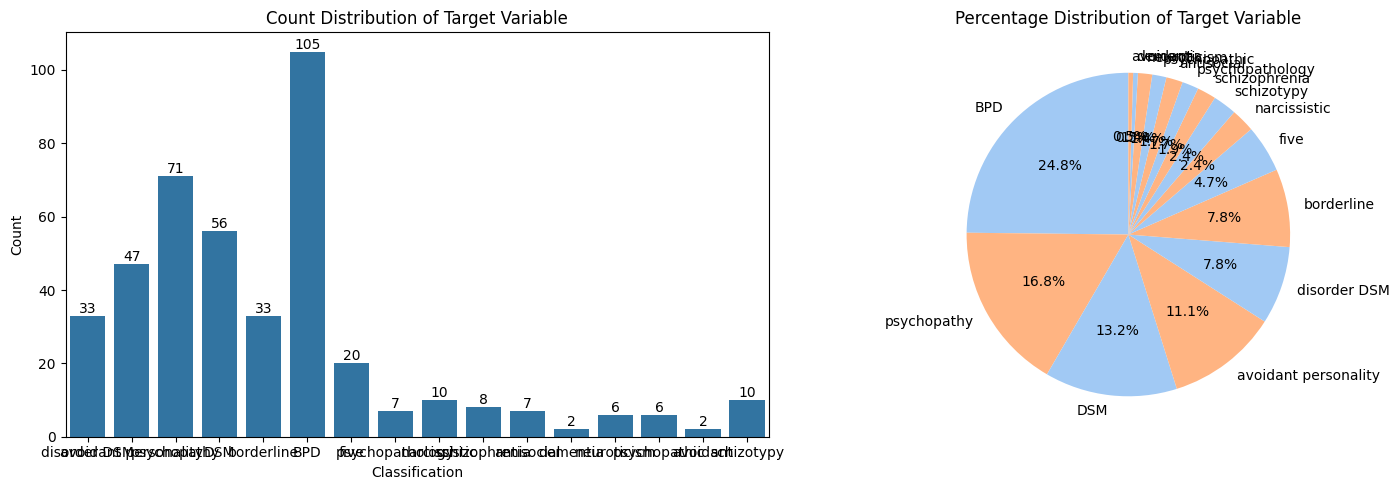

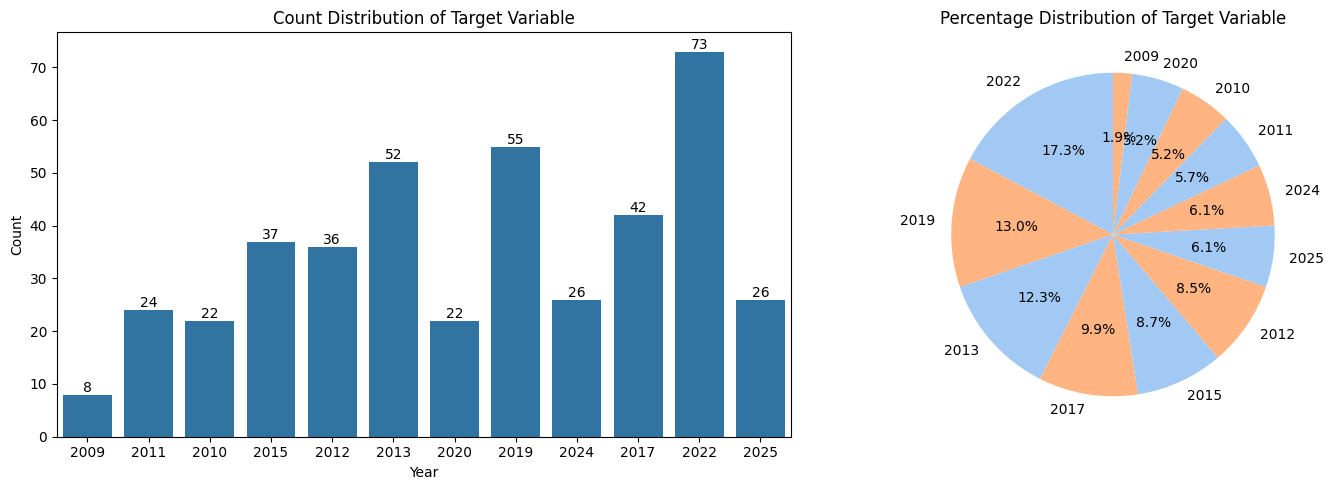

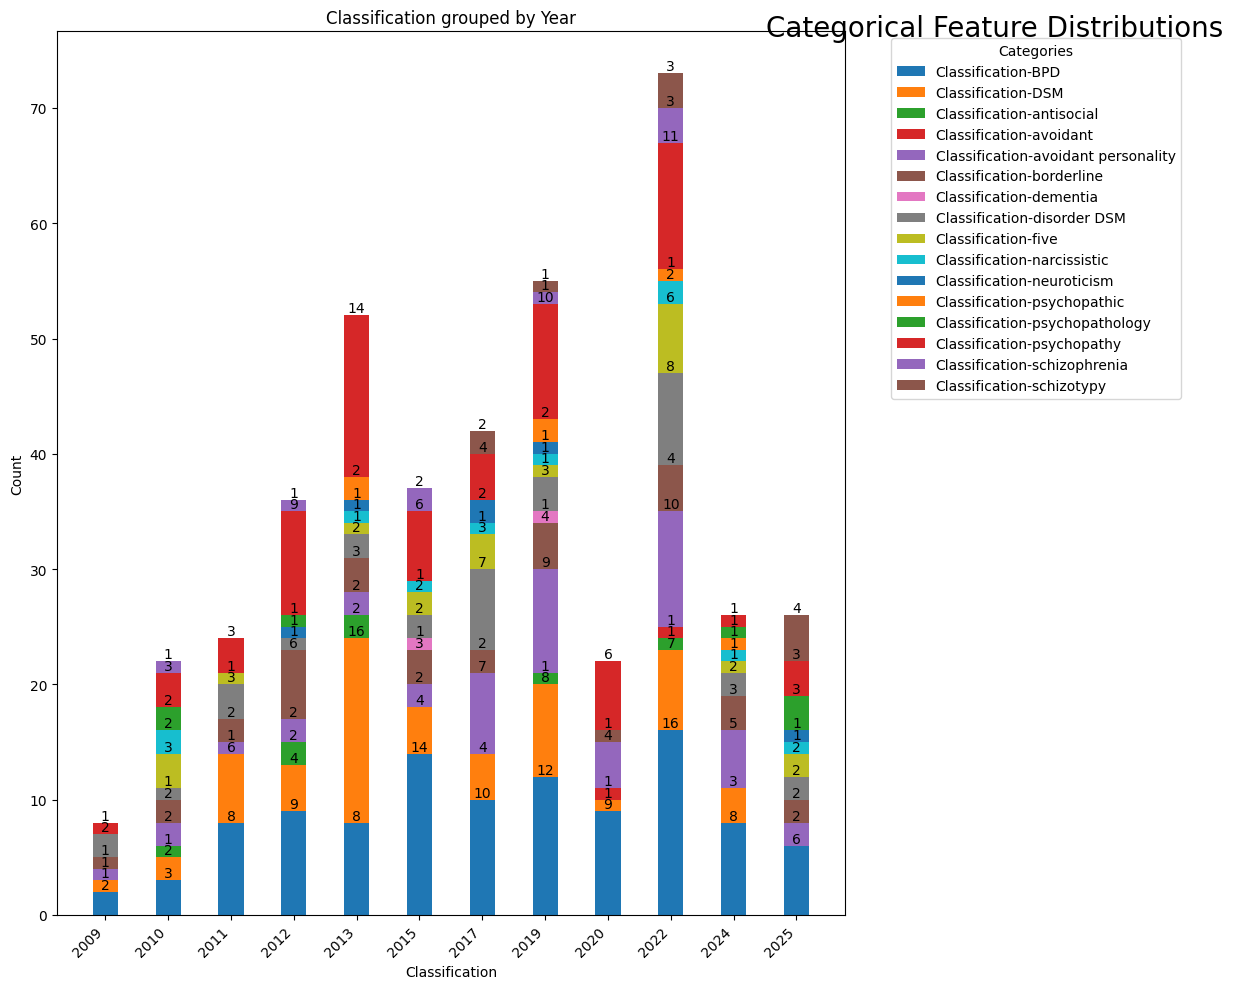

In [42]:
Total_Classification = overall_data['Classification'].unique()
print(f"Total Classification: {Total_Classification}")
analyze_target_distribution(overall_data, 'Classification')
analyze_target_distribution(overall_data, 'Year')
display_categorical_distributions(overall_data, ["Classification"], target='Year')

In [43]:
overall_data = overall_data.drop('file_path', axis=1)
overall_data

,Journal name,Year,Title,Keywords,text,Acronyms,Sequences,lengths,correlations,Classification
0,"Personality Disorders: Theory, Research, and T...",2009,Evidence-based assessment of personality disor...,"[base, personality, e, disorders, disorder, av...",Evidence-Based Assessment of Personality Disor...,,"[interview, personality, disorder, semi, repor...","[{'term': 'interview', 'length': 94}, {'term':...","[interpersonal, disorders, DSM personality, pe...",disorder DSM
1,"Personality Disorders: Theory, Research, and T...",2009,A Dimensional Model of Personality Disorder In...,"[patient, personality, DSMIV, e, borderline, d...",A Dimensional Model of Personality Disorder: I...,,"[pathology, dimensional, questionnaire, person...","[{'term': 'disorder', 'length': 55}, {'term': ...","[BPD, interpersonal, disorders, DSM personalit...",avoidant personality
2,"Personality Disorders: Theory, Research, and T...",2009,Early Temperamental and Psychophysiological Pr...,"[mental, impairment, psychopathology, adult, e...",Early Temperamental and Psychophysiological Pr...,,"[temperament, recovery, psychopathy, child, st...","[{'term': 'child', 'length': 33}, {'term': 'ra...","[psychopathy, interpersonal, disorders, pathol...",psychopathy
3,"Personality Disorders: Theory, Research, and T...",2009,Differential Impairment as an Indicator of Sex...,"[mental, compare, impairment, harm, base, pati...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[diagnosis, disorders, gender, bias, disorder,...","[{'term': 'gender', 'length': 20}, {'term': 'b...","[DSM, interpersonal, disorders, DSM personalit...",DSM
4,"Personality Disorders: Theory, Research, and T...",2009,Differential Impairment as an Indicator of Sex...,"[mental, compare, impairment, harm, base, pati...",Understanding the Role of Impulsivity and Exte...,,"[aa, gender, abuser, control, impulsivity, par...","[{'term': 'gender', 'length': 26}, {'term': 'i...","[interpersonal, disorders, DSM personality, pe...",disorder DSM
...,...,...,...,...,...,...,...,...,...,...
418,"Personality Disorders: Theory, Research, and T...",2025,Investigating empathy in schizotypy,"[schizotypy, e, investigation, five, pain, sch...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[associate, empathy, cognitive, affective, pos...","[{'term': 'positive', 'length': 33}, {'term': ...","[DSM personality, personality, avoidant person...",schizotypy
419,"Personality Disorders: Theory, Research, and T...",2025,"The urge to fill the void Emptiness, impulsivi...","[mental, personality, e, impulsivity, borderli...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[BPD, emptiness, association, personality, beh...","[{'term': 'impulsivity', 'length': 95}, {'term...","[BPD, interpersonal, disorders, DSM personalit...",BPD
420,"Personality Disorders: Theory, Research, and T...",2025,Daily loneliness and suicidal ideation in bord...,"[validation, personality, e, borderline, disor...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[BPD, si, borderline, association, personality...","[{'term': 'association', 'length': 45}, {'term...","[BPD, interpersonal, disorders, DSM personalit...",BPD
421,"Personality Disorders: Theory, Research, and T...",2025,Elemental psychopathy assessment’s nomological...,"[analysis, mental, psychopathology, base, e, p...",\n\n\n\n\tEBSCOhost\n\n\n\n\n\n\n\n\n\n\n\n\n\...,,"[EPA, positive, personality, association, emot...","[{'term': 'lynam', 'length': 79}, {'term': 'em...","[psychopathy, disorders, DSM personality, pers...",psychopathy


In [44]:
filter_table = overall_data[overall_data['Classification'].isna()]

for item,row in filter_table.iterrows():
  print(row["Title"])
  print(row["Keywords"])
  print(row["Sequences"])
  print(row["correlations"])

overall_data.dropna(subset=['Classification'], inplace=True)

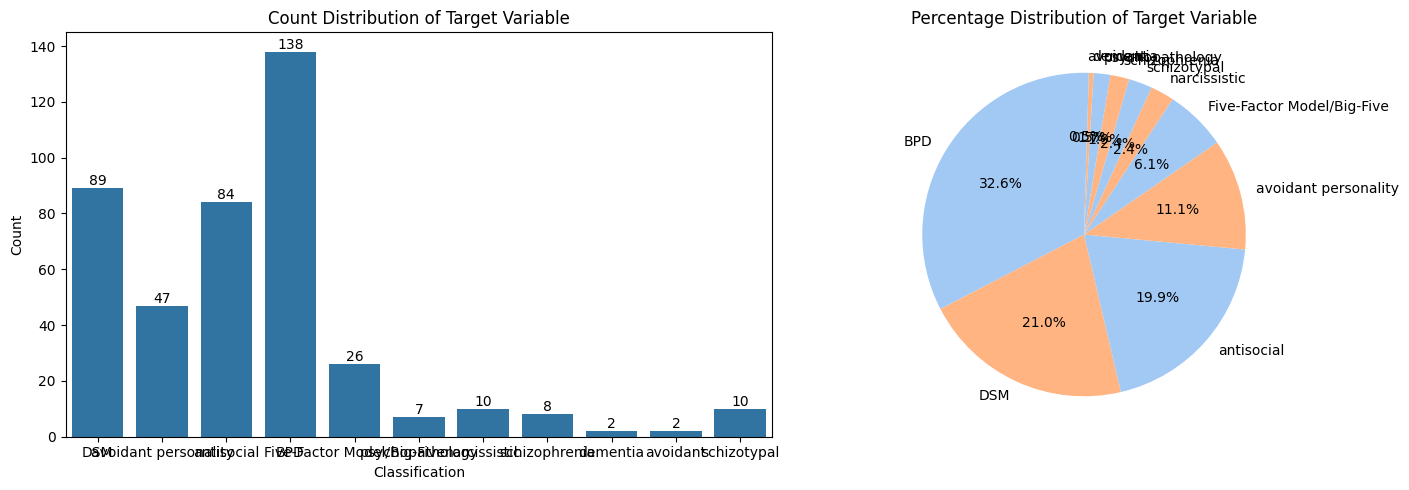

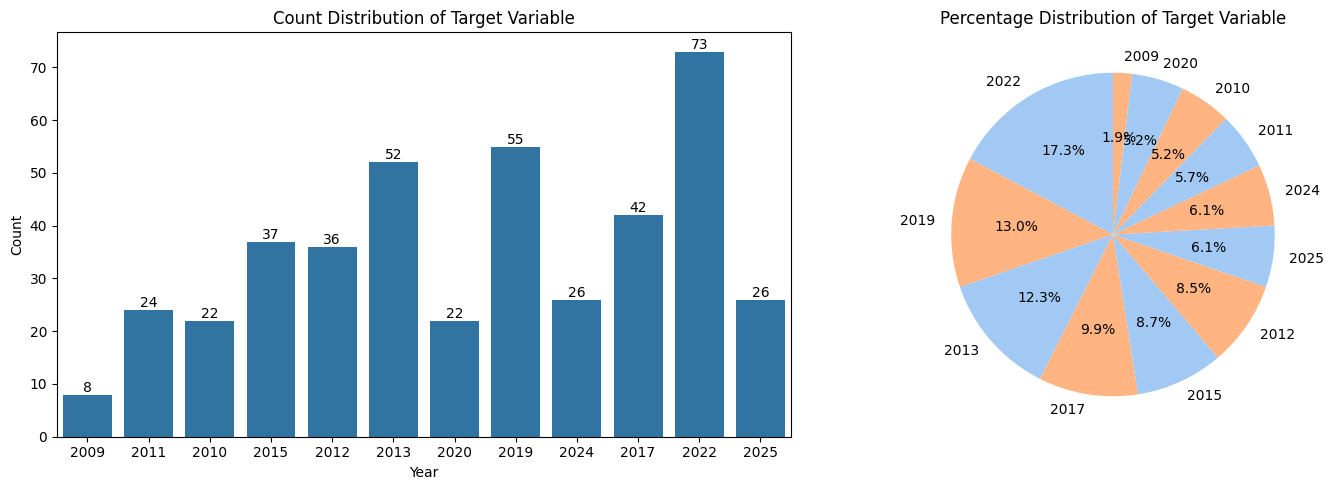

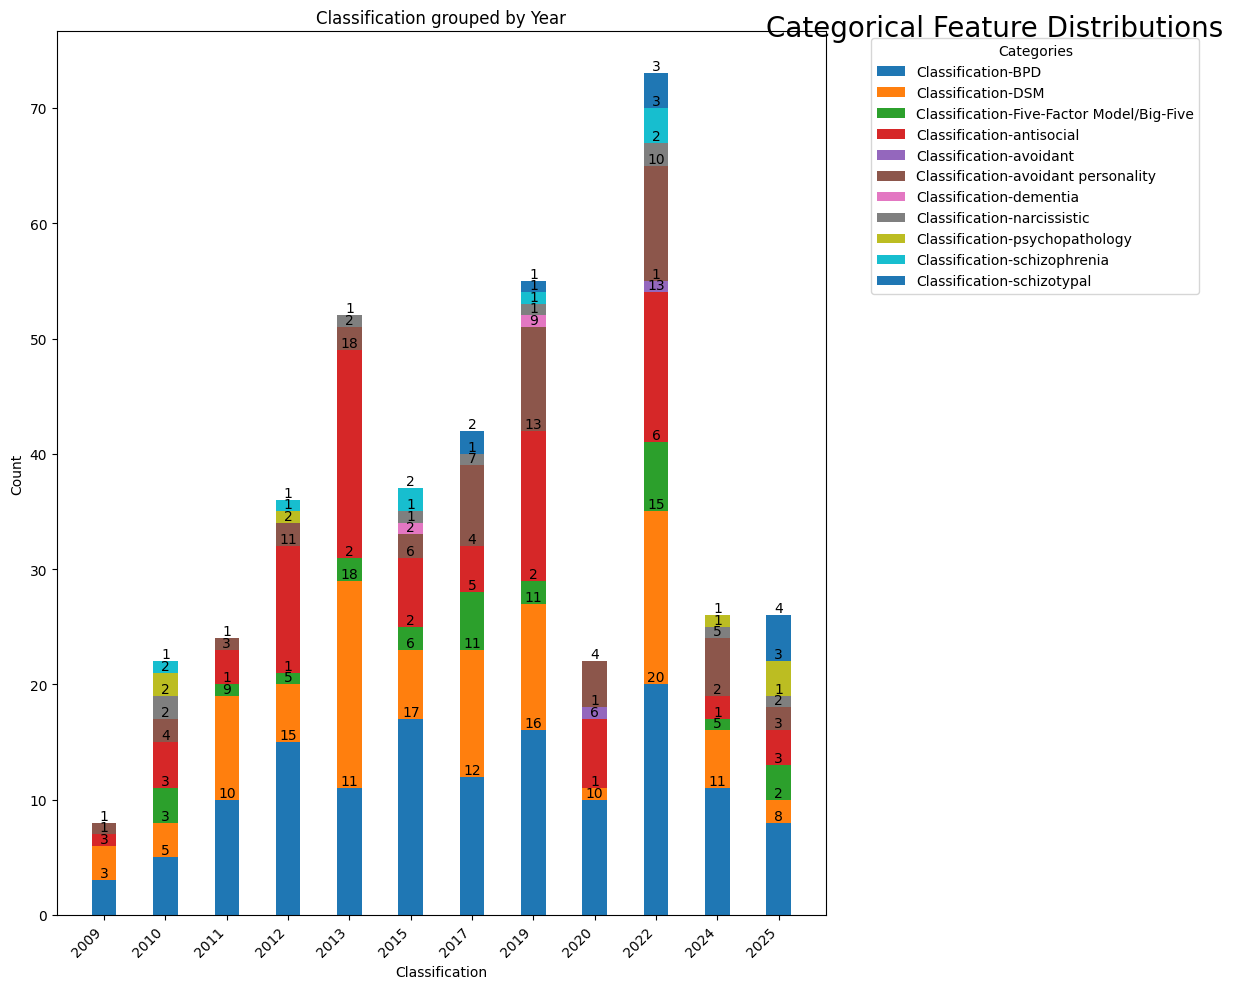

In [45]:
#REPLACING values in classifications to narrow it down!
overall_data['Classification'] = overall_data['Classification'].replace('DSM personality','DSM')
overall_data['Classification'] = overall_data['Classification'].replace('disorder DSM','DSM')
overall_data['Classification'] = overall_data['Classification'].replace('ampd','DSM')
overall_data['Classification'] = overall_data['Classification'].replace('five','Five-Factor Model/Big-Five')
overall_data['Classification'] = overall_data['Classification'].replace('neuroticism','Five-Factor Model/Big-Five')
overall_data['Classification'] = overall_data['Classification'].replace('borderline','BPD')
overall_data['Classification'] = overall_data['Classification'].replace('psychopathic','psychopathy')
overall_data['Classification'] = overall_data['Classification'].replace('psychopathy', "antisocial")
overall_data['Classification'] = overall_data['Classification'].replace('schizotypy','schizotypal')
overall_data['Classification'] = overall_data['Classification'].replace('personality disorders','personality disorder')
analyze_target_distribution(overall_data, 'Classification')
analyze_target_distribution(overall_data, 'Year')
display_categorical_distributions(overall_data, ["Classification"], target='Year')

#GRAPHS TO UNDERSTAND EVOLUTION OF SEQUENCES THROUGHOUT THE YEARS

In [46]:
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
import spacy

# Load a spaCy model with word vectors
nlp = spacy.load("en_core_web_md")  # Requires large model for better phrase embeddings

def track_sequence_evolution(overall_data,classif):
    """
    Track semantic evolution of sequences (phrases) across years using cosine similarity.
    """
    # Step 1: Aggregate sequences by year
    sequences_by_year = defaultdict(list)
    for _, row in overall_data.iterrows():
        sequences_by_year[row["Year"]].extend(row["Sequences"])

    # Step 2: Precompute sequence embeddings
    year_sequence_embeddings = defaultdict(dict)
    for year, sequences in sequences_by_year.items():
        unique_sequences = list(set(sequences))  # Deduplicate
        for seq in unique_sequences:
            doc = nlp(seq)
            if doc.has_vector:
                year_sequence_embeddings[year][seq] = doc.vector

    # Step 3: Compare sequences year-to-year
    sequence_evolution = []
    sorted_years = sorted(year_sequence_embeddings.keys())

    for i in range(len(sorted_years) - 1):
        year1, year2 = sorted_years[i], sorted_years[i + 1]

        # Compare sequences in Year1 to Year2
        for seq1, vec1 in year_sequence_embeddings[year1].items():
            best_match, best_sim = None, -1

            for seq2, vec2 in year_sequence_embeddings[year2].items():
                sim = cosine_similarity([vec1], [vec2])[0][0]
                if sim > best_sim:
                    best_sim = sim
                    best_match = seq2

            sequence_evolution.append({
                "classification": classif,
                "sequence": seq1,
                "year": year1,
                "next_year": year2,
                "best_match": best_match,
                "similarity": best_sim,
                "is_same_sequence": (seq1 == best_match),  # True if unchanged
                "is_semantic_shift": (best_sim < 0.7 and seq1 != best_match)  # Threshold
            })

    return pd.DataFrame(sequence_evolution)

# Usage
#df_sequence_evolution = pd.DataFrame()
#for items in classifications:
#  data_find = overall_data[overall_data['Classification'] == items]
#  df_sequence_evolution_term = track_sequence_evolution(overall_data, items)
#  df_sequence_evolution = pd.concat([df_sequence_evolution, df_sequence_evolution_term], ignore_index=True)

In [47]:
#df_sequence_evolution

TODO not working...

In [48]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def graph_evolution(df_sequence_evolution):
  # Create a directed graph
  G = nx.DiGraph()

  # Add edges with attributes - using correct column names from df_sequence_evolution
  for _, row in df_sequence_evolution.iterrows():
      G.add_edge(row['sequence'],
                row['best_match'],
                year=row['year'],
                next_year=row['next_year'],
                similarity=row['similarity'],
                year_pair=f"{row['year']}→{row['next_year']}")

  # Create a color map based on years
  unique_years = sorted(df_sequence_evolution['year'].unique())
  color_map = cm.get_cmap('tab20', len(unique_years))
  year_to_color = {year: color_map(i) for i, year in enumerate(unique_years)}

  # Assign colors to edges based on starting year
  edge_colors = []
  for u, v, data in G.edges(data=True):
      edge_colors.append(year_to_color[data['year']])

  # Improved layout with hierarchical structure
  pos = nx.spring_layout(G, k=0.8, seed=42, iterations=100)

  # Create figure
  plt.figure(figsize=(16, 12))

  # Draw nodes with different colors for classifications if available
  node_colors = []
  if 'classification' in df_sequence_evolution.columns:
      unique_classes = df_sequence_evolution['classification'].unique()
      class_map = cm.get_cmap('Set2', len(unique_classes))
      class_to_color = {cls: class_map(i) for i, cls in enumerate(unique_classes)}
      node_colors = [class_to_color[row['classification']]
                    for node in G.nodes()
                    for _, row in df_sequence_evolution[df_sequence_evolution['sequence'] == node].head(1).iterrows()]
  else:
      node_colors = 'lightgray'

  nx.draw_networkx_nodes(G, pos, node_size=2500,
                        node_color=node_colors,
                        alpha=0.9,
                        edgecolors='black',
                        linewidths=2)

  # Draw edges with arrows and color coding
  nx.draw_networkx_edges(G, pos,
                        width=2,
                        alpha=0.7,
                        edge_color=edge_colors,
                        arrows=True,
                        arrowsize=20,
                        connectionstyle='arc3,rad=0.1')

  # Draw node labels
  nx.draw_networkx_labels(G, pos,
                        font_size=10,
                        font_weight='bold')

  # Create custom edge labels with similarity scores
  edge_labels = {}
  for u, v, data in G.edges(data=True):
      edge_labels[(u, v)] = f"{data['year_pair']}\n({data['similarity']:.2f})"

  nx.draw_networkx_edge_labels(G, pos,
                            edge_labels=edge_labels,
                            font_size=8,
                            bbox=dict(alpha=0.8))

  # Create legend for year colors
  legend_elements = [plt.Line2D([0], [0],
                    color=year_to_color[year],
                    lw=4,
                    label=year) for year in unique_years]
  plt.legend(handles=legend_elements,
            title='Starting Year',
            bbox_to_anchor=(1.05, 1),
            loc='upper left')

  # Add classification legend if available
  if 'classification' in df_sequence_evolution.columns:
      class_elements = [plt.Line2D([0], [0],
                        marker='o',
                        color='w',
                        markerfacecolor=class_to_color[cls],
                        markersize=10,
                        label=cls) for cls in unique_classes]
      plt.legend(handles=class_elements,
                title='Classification',
                bbox_to_anchor=(1.05, 0.7),
                loc='upper left')

  plt.title("Semantic Evolution Network\n(Edge labels show year transition and similarity score)",
          fontsize=14, pad=20)
  plt.axis('off')
  plt.tight_layout()
  plt.show()

#graph_evolution(df_sequence_evolution)

##FIRST round of PCA. Pretty much ALL Useless keywords are still present.


=== Key Insights ===
Optimal number of clusters: 2
Best silhouette score: 0.448

Cluster-Classification Overlap:
Classification  BPD  DSM  Five-Factor Model/Big-Five  antisocial  avoidant  \
Cluster                                                                      
0                 0    0                           0           0         0   
1                 1    1                           1           1         1   

Classification  avoidant personality  dementia  narcissistic  psychopathology  \
Cluster                                                                         
0                                  0         1             0                0   
1                                  1         0             1                1   

Classification  schizophrenia  schizotypal  
Cluster                                     
0                           1            0  
1                           0            1  

Top terms per cluster:

Cluster 1 (638 terms):
['AAQII', 'AB', 'ABC

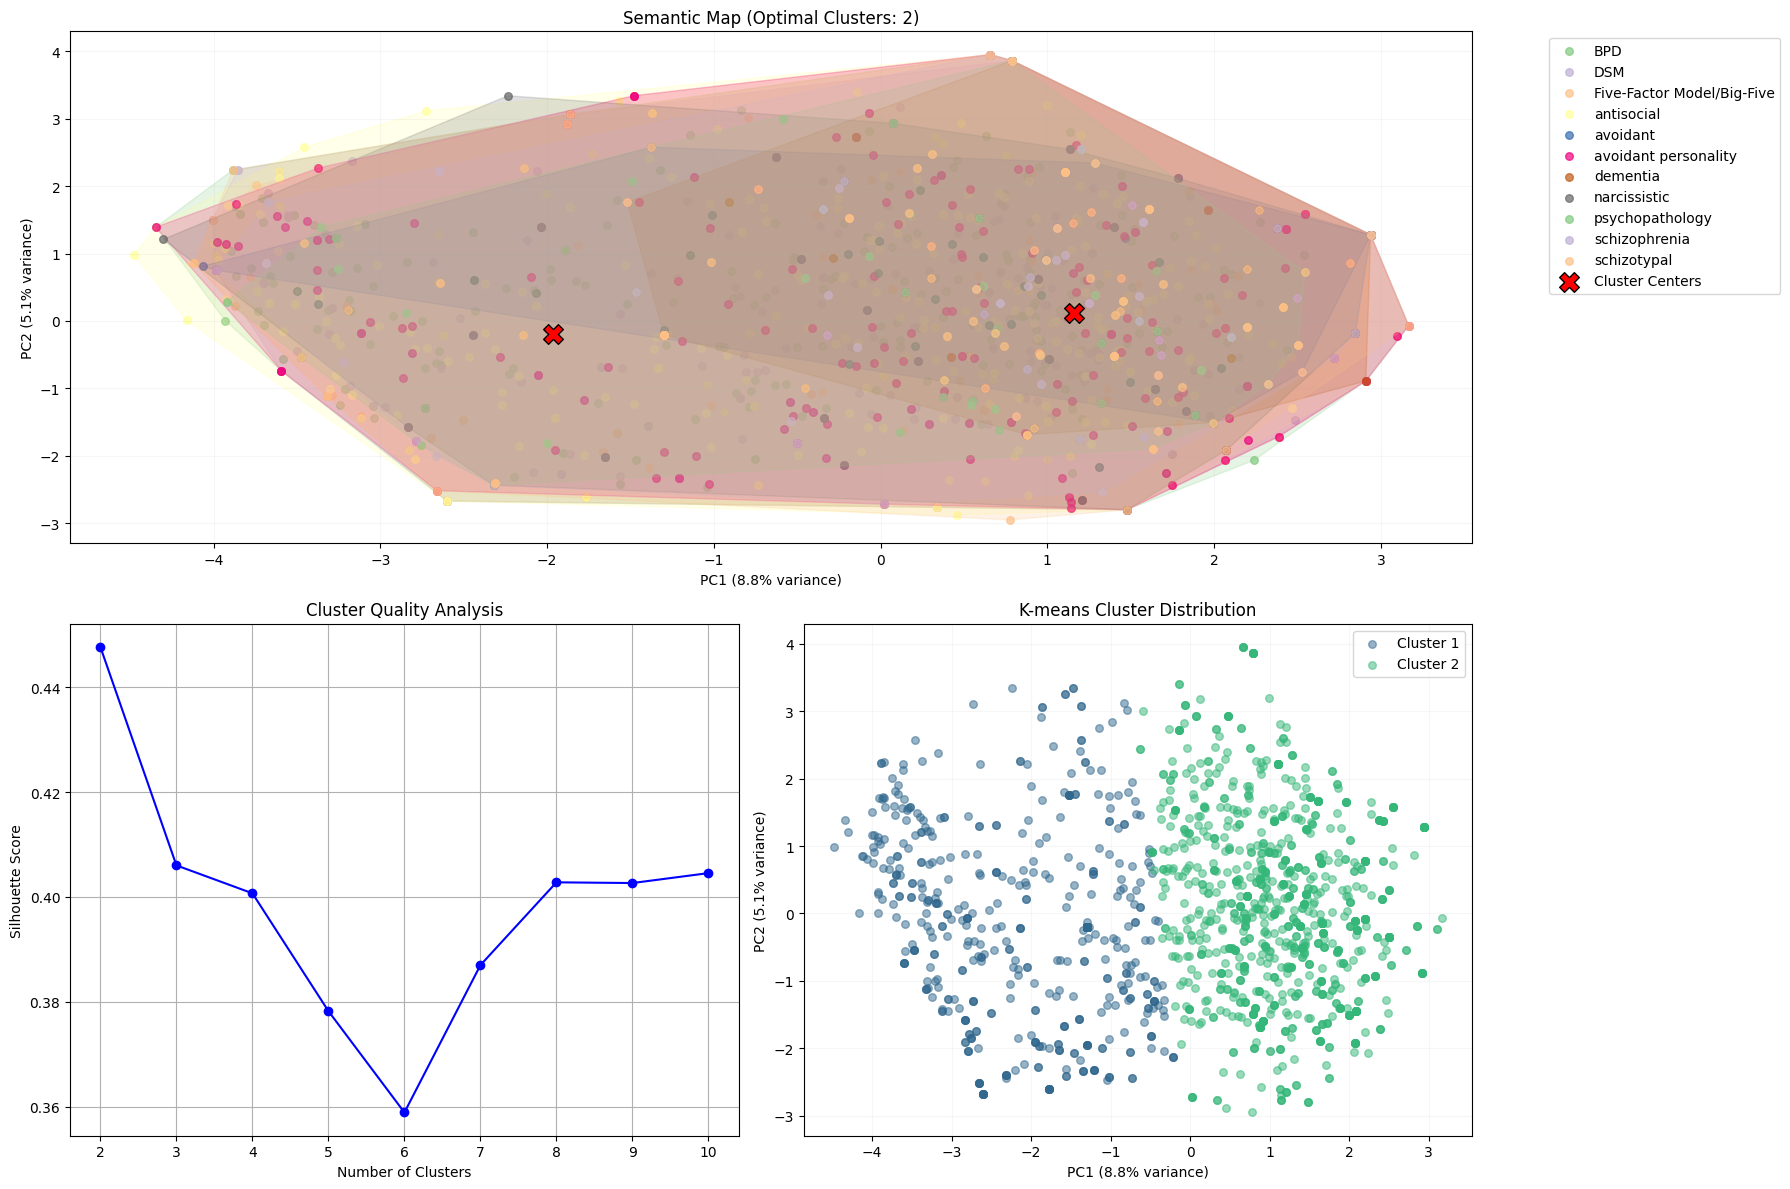

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial import ConvexHull
import seaborn as sns

def plot_pca_with_analysis(overall_data):
    # 1. Prepare Data
    sequences = overall_data["Sequences"].explode().unique().tolist()
    classifications = overall_data["Classification"].explode().unique().tolist()

    seq_to_class = defaultdict(list)
    for _, row in overall_data.iterrows():
        for seq in row["Sequences"]:
            seq_to_class[seq].append(row["Classification"])

    # Generate embeddings
    embeddings = np.array([nlp(seq).vector for seq in sequences])

    # 2. Dimensionality Reduction
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # 3. Cluster Analysis
    # Determine optimal clusters (2-10)
    silhouette_scores = []
    possible_clusters = range(2, min(11, len(set(classifications)) + 2))

    for n_clusters in possible_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(reduced_embeddings)
        silhouette_scores.append(silhouette_score(reduced_embeddings, labels))

    optimal_clusters = possible_clusters[np.argmax(silhouette_scores)]
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_embeddings)

    # 4. Visualization
    plt.figure(figsize=(18, 12))

    # Color setup
    unique_classes = sorted(set(classifications))
    class_colors = sns.color_palette("Accent", len(unique_classes))
    class_to_color = {cls: class_colors[i] for i, cls in enumerate(unique_classes)}

    cluster_colors = sns.color_palette("viridis", optimal_clusters)

    # Create subplots
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)  # Main PCA plot
    ax2 = plt.subplot2grid((2, 2), (1, 0))             # Silhouette plot
    ax3 = plt.subplot2grid((2, 2), (1, 1))             # Cluster overlap

    # Main PCA Plot (Classification Colors)
    for i, cls in enumerate(unique_classes):
        mask = np.array([cls in seq_to_class[seq] for seq in sequences])
        ax1.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1],
                   color=class_to_color[cls], alpha=0.7, s=30, label=cls)

        # Add convex hull for each classification
        if sum(mask) > 2:  # Need at least 3 points for convex hull
            hull = ConvexHull(reduced_embeddings[mask])
            poly = plt.Polygon(reduced_embeddings[mask][hull.vertices], alpha=0.2,
                             color=class_to_color[cls])
            ax1.add_patch(poly)

    # Add cluster centers
    ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               marker='X', s=200, c='red', edgecolor='black', label='Cluster Centers')

    ax1.set_title(f"Semantic Map (Optimal Clusters: {optimal_clusters})")
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(alpha=0.1)

    # Silhouette Plot
    ax2.plot(possible_clusters, silhouette_scores, 'bo-')
    ax2.set_xlabel("Number of Clusters")
    ax2.set_ylabel("Silhouette Score")
    ax2.set_title("Cluster Quality Analysis")
    ax2.grid(True)

    # Cluster Overlap Plot
    for i in range(optimal_clusters):
        mask = cluster_labels == i
        ax3.scatter(reduced_embeddings[mask, 0], reduced_embeddings[mask, 1],
                   color=cluster_colors[i], alpha=0.5, s=30, label=f'Cluster {i+1}')

    ax3.set_title("K-means Cluster Distribution")
    ax3.legend()
    ax3.grid(alpha=0.1)

    # Add variance explained
    for ax in [ax1, ax3]:
        ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
        ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")

    plt.tight_layout()

    # 5. Print Insights
    print("\n=== Key Insights ===")
    print(f"Optimal number of clusters: {optimal_clusters}")
    print(f"Best silhouette score: {max(silhouette_scores):.3f}")

    # Cluster-classification overlap
    print("\nCluster-Classification Overlap:")
    cluster_class_matrix = pd.crosstab(
        pd.Series(cluster_labels, name='Cluster'),
        pd.Series(classifications, name='Classification'))
    print(cluster_class_matrix)

    # Most representative terms per cluster
    print("\nTop terms per cluster:")
    for cluster_id in range(optimal_clusters):
        cluster_terms = [seq for i, seq in enumerate(sequences) if cluster_labels[i] == cluster_id]
        print(f"\nCluster {cluster_id+1} ({len(cluster_terms)} terms):")
        top_20 = sorted(set(cluster_terms))[:20]
        print(top_20)  # Show first 20 unique terms

    plt.show()

plot_pca_with_analysis(overall_data)

#THIS CODE is to run the PCA whenever there is a CLEANSE of sequences. Lets see the wvolution! #TODO FIX THIS

In [50]:
def cleanse_sequences(overall_data, new_sequence_list = None, keep_list = None):
  """
  overall_data is the df to edit
  new_sequence_list is optional, meant for replacements. It a list of tuples, the first item being the word to replace and the second being what to replace it WITH
  keep_list is optional. If it is sent, we ONLY want to have the sequences and lengths to contain terms within that list!
  --------
  This method parses through the df to remove and replace terms in the sequences AND list folders to cut down on terms!
  """
  if new_sequence_list:
    for i,row in overall_data.iterrows():
      sequences = row["Sequences"].explode().tolist()
      lengths = row["lengths"]
      new_sequences = sequences
      for to_find, to_replace in new_sequence_list:
        if to_find in sequences:
          new_sequences = list(set([to_replace if word == to_find else word for word in sequences]))
          add_lengths = [item["amount"] for item in lengths if item["term"] == to_find]
          for item in lengths:
            if item["term"] == to_replace:
              item["amount"] += sum(add_lengths) #sum the add_lengths
          index_to_del = [i for i, item in enumerate(lengths) if item["term"] == to_find]
          for index in sorted(index_to_del, reverse=True): #delete in reverse order to avoid index issues
            del lengths[index]
      overall_data.at[i, "Sequences"] = new_sequences
      overall_data.at[i, "lengths"] = lengths

  if keep_list:
    for i,row in overall_data.iterrows():
      # Convert to lists (if they aren't already) for consistent processing
      sequences = row["Sequences"] if isinstance(row["Sequences"], list) else row["Sequences"].tolist()
      lengths = row["lengths"] if isinstance(row["lengths"], list) else row["lengths"].tolist()

      # Find sequences to keep and update overall_data
      new_sequences = [sequence for sequence in sequences if sequence in keep_list]
      new_lengths = [item for item in lengths if item["term"] in new_sequences]

      overall_data.at[i, "Sequences"] = new_sequences
      overall_data.at[i, "lengths"] = new_lengths

  #NOW PLOT PCA AGAIN
  plot_pca_with_analysis(overall_data)

  #RETURN UPDATED OVERALL DATA
  return overall_data


##THIS is to track counts over the years! Grouped by EMBEDDINGS
- Replace terms with over 0.9 similarity with most frequenctly used term!

In [51]:
!pip install scipy

In [52]:
# Create a defaultdict to accumulate texts by year
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch

def similarity_over_years(overall_data):
  """
  Graphs usage of terminology over a period of time, grouped by embeddings of cosine similarities over 0.7
  If the cosine similarity is over 0.95, we REPLACE terms to be the one that is MOST used!
  """
  joined_by_year = defaultdict(lambda: defaultdict(int))

  for i,entry in overall_data.iterrows():
      year = int(entry["Year"])
      text = entry["lengths"]
      for item in text:
        text_object = item['term']
        numbers = item['length']
        joined_by_year[text_object][year] += numbers

  #SORT BY YEAR for each!
  for term in joined_by_year.keys():
    joined_by_year[term] = dict(sorted(joined_by_year[term].items(),key = lambda x: x[0]))

  #NOW I want to be able to filter out terms that have less than 5 occurances!
  to_del = ['statistical', 'analysis', 'categorical','couples','change',
            'identifier','occupational','severity', 'onset', 'prevalence', 'relationship','effects','skills']
  for term in joined_by_year.keys():
    if len(joined_by_year[term]) < 3:
      to_del.append(term)

  for term in to_del:
    if term in joined_by_year.keys():
      del joined_by_year[term]

  #FIND the terms that have similarities all over a 0.7!
  all_keys = list(set(joined_by_year.keys()))
  embeddings = [nlp(phrase).vector for phrase in all_keys]
  similarity_matrix = cosine_similarity(embeddings)

  #GRAPH
  def plot_similarity_matrix(similarity_matrix):

    similarity_df = pd.DataFrame(similarity_matrix, index=all_keys, columns=all_keys)

    # --- PARAMETERS ---
    filter_by = "top_n"    # options: "top_n" or "similarity_threshold"
    top_n = 50            # if using "top_n", how many top items
    similarity_threshold = 0.7  # if using "similarity_threshold", minimum similarity

    # --- LOAD / CREATE similarity_df ---
    # Assuming you already have:
    # similarity_df = pd.DataFrame(similarity_matrix, index=all_keys, columns=all_keys)

    # --- FILTER ---
    if filter_by == "top_n":
        important_keys = similarity_df.index[:top_n]  # Just first N; you can sort if needed
        filtered_similarity_df = similarity_df.loc[important_keys, important_keys]
    elif filter_by == "similarity_threshold":
        similarity_df['max_similarity'] = similarity_df.max(axis=1)
        filtered_similarity_df = similarity_df[similarity_df['max_similarity'] > similarity_threshold]
        filtered_similarity_df = filtered_similarity_df.drop(columns=['max_similarity'])
        filtered_similarity_df = filtered_similarity_df[filtered_similarity_df.index]
    else:
        raise ValueError("filter_by must be either 'top_n' or 'similarity_threshold'.")

    # --- CLUSTER ---
    linkage = sch.linkage(filtered_similarity_df, method='ward')
    dendro = sch.dendrogram(linkage, no_plot=True)
    reordered_index = dendro['leaves']

    clustered_matrix = filtered_similarity_df.iloc[reordered_index, reordered_index]

    # --- PLOT ---
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(clustered_matrix, annot=False, cmap='YlGnBu', linewidths=0.5, ax=ax)
    plt.title("Clustered Similarity Heatmap", fontsize=16)
    plt.show()

  plot_similarity_matrix(similarity_matrix)

  #CREATE 2D array of GROUPS TO GRAPH
  groups = []
  for i,term in enumerate(all_keys):

    similar_indices = np.where(similarity_matrix[i] > 0.7)[0]
    group = [all_keys[idx] for idx in similar_indices]

    if group:  # Only add non-empty groups
        groups.append(group)

  for group in groups:

    plt.figure(figsize=(10, 6))
    for term in group:

      get_term_info = joined_by_year[term]
      all_years = get_term_info.keys()
      all_counts = get_term_info.values()

      plt.plot(all_years, all_counts, label=term)
      plt.yscale('log')

    print(group)
    plt.title(f'Evolution of Semantically Similar terms: {group} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Relative Frequency')
    plt.legend(title='Terms', loc='upper left')
    plt.grid(True)
    plt.show()

  #NOW we want to REPLACE groups that have embedditings OVER a specified threshold! We must ensure this is done to the original data as well!
  include_sequences = []

  #CREATE Distinct groups of similarities!
  groups = []
  still_group = set(all_keys)
  for i,term in enumerate(all_keys):
    if term not in still_group:
      continue

    similar_indices = np.where(similarity_matrix[i] > 0.97)[0]
    group = [all_keys[idx] for idx in similar_indices
              if all_keys[idx] in still_group]

    if group:  # Only add non-empty groups
        groups.append(group)
        still_group.difference_update(group)

  #REPLACE VALUES!
  for group in groups:
    filtered_list = [term for term in joined_by_year.keys() if term in group]
    value_with_largest = [{"term": term, "amount": sum(joined_by_year[term].values())} for term in filtered_list]
    value_with_largest = sorted(value_with_largest, key = lambda x: x["amount"], reverse=False)
    include_sequences = [(replace,value_with_largest[0]) for replace in value_with_largest[1:]]

  #REDUCE AND GRAPH THE RESULT
  reduced_df = cleanse_sequences(overall_data, new_sequence_list = include_sequences)

  return reduced_df

#PLOT Similarity over years and accept df with reduced sequences
#overall_data = similarity_over_years(overall_data)
#PLOT again, do not change second time around!
#similarity_over_years(overall_data)

#NOW WE CREATE A DF THAT IS USEABLE FOR PREDICTIONS.

Classify articles based on mined patterns. Use the “Word Frequencies”, “Word Association”, “Title Terms”, and “Year”. Create a new data frame, with each possible phrase found in the word frequencies column turning into its own column as well as each association rule from title terms becoming its own column. The word frequencies will contain binary values for “appears” or “does not appear” while the association columns will contain the confidence scores for each. The labels to be predicted will be the "Classification” alongside “Year”.

In [69]:
#FIRST STEP is toconvert our ORIGINAL dataframe into one that can be PREDICTED
"""
Sample Dataframe:
  Borderline	Narcissist	Relationship	Speak	Avoidant	Year  Classification
  0.8	         0.1	      0.7	          0.0	   0.0	    2018  BPD
  0.2        	0.9	        0.0	          0.0  	0.6	      2018  Narcissistic Personality
  0.7	        0.0	        0.5	          0.0	   0.0	    2018  BPD

  Step 1: Convert to dataframe like above, for ALL data
 the numbers are the CONFIDENCE  that it is related!
 it is multiplied by a BINARY value...
 ALONGSIDE, we want to gather a dataframe for corresponding LIFTS (to be used as PENALTY for logistic regression!)
"""
import pandas as pd
from collections import defaultdict

#FIRST make a df of counts per classification!
class_keyword_counts = pd.DataFrame(columns=['Classification', 'Year', 'Keyword', 'Count','P_keyword_given_class','P_keyword_global','Lift','Confidence'])
for i,row in overall_data.iterrows():
  classification_1 = row['Classification']
  year_1 = row['Year']
  for item in row['lengths']:
    keyword = item['term']
    amount = item['length']
    location = len(class_keyword_counts)
    mask = (class_keyword_counts['Classification'] == classification_1) & (class_keyword_counts['Keyword'] == keyword) & (class_keyword_counts['Year'] == year_1)
    if mask.any():
        class_keyword_counts.loc[mask, 'Count'] += amount
    else:
      class_keyword_counts.loc[location,"Classification"] =  classification_1
      class_keyword_counts.loc[location,"Year"] = year_1
      class_keyword_counts.loc[location,"Keyword"] = keyword
      class_keyword_counts.loc[location,"Count"] = amount

class_keyword_counts

,Classification,Year,Keyword,Count,P_keyword_given_class,P_keyword_global,Lift,Confidence
0,DSM,2009,interview,94,NaN,NaN,NaN,NaN
1,DSM,2009,provide,38,NaN,NaN,NaN,NaN
2,DSM,2009,inventory,40,NaN,NaN,NaN,NaN
3,DSM,2009,report,53,NaN,NaN,NaN,NaN
4,DSM,2009,widiger,34,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5203,schizotypal,2025,widiger,29,NaN,NaN,NaN,NaN
5204,schizotypal,2025,psychotic,59,NaN,NaN,NaN,NaN
5205,schizotypal,2025,result,29,NaN,NaN,NaN,NaN
5206,schizotypal,2025,find,41,NaN,NaN,NaN,NaN


##CALCULATE Lift and Confidence for each, then CLEAN by dropping based on lifts and confidence thresholds. Feature Selection!

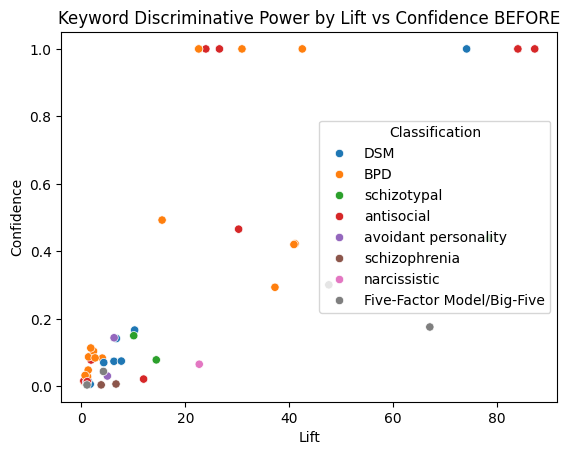

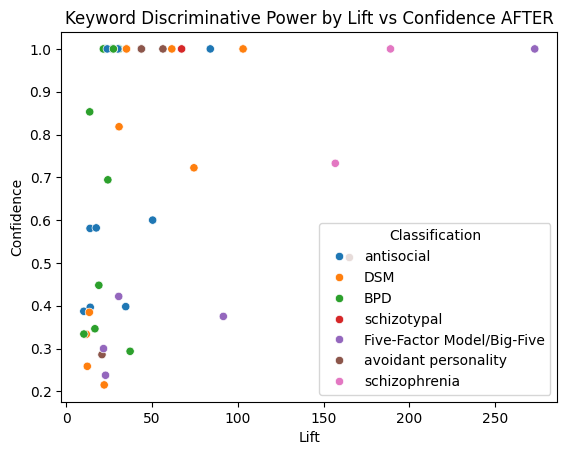

,Classification,Year,Keyword,Count,P_keyword_given_class,P_keyword_global,Lift,Confidence
6,DSM,2009,semi,64,0.032888,0.000294,111.871350,0.752941
12,avoidant personality,2009,perceptual,15,0.042980,0.000052,828.467049,1.000000
13,avoidant personality,2009,relative,16,0.045845,0.000194,236.704871,0.285714
15,avoidant personality,2009,questionnaire,13,0.037249,0.000218,170.953518,0.206349
20,avoidant personality,2009,livesley,13,0.037249,0.000045,828.467049,1.000000
...,...,...,...,...,...,...,...,...
5197,schizotypal,2025,absorption,55,0.012794,0.000190,67.256339,1.000000
5200,schizotypal,2025,openness,40,0.009304,0.000287,32.412693,0.481928
5201,schizotypal,2025,oe,156,0.036288,0.000671,54.082417,0.804124
5202,schizotypal,2025,thinking,41,0.009537,0.000287,33.223011,0.493976


In [70]:
# Total documents per class
class_totals = class_keyword_counts.groupby(['Classification','Year'])['Count'].sum().to_dict()
global_keyword_counts = class_keyword_counts.groupby('Keyword')['Count'].sum().to_dict()
total_counts = sum(global_keyword_counts.values())

class_keyword_counts['P_keyword_given_class'] = class_keyword_counts.apply(
    lambda x: x['Count'] / class_totals[x['Classification'],x['Year']], axis=1)
class_keyword_counts['P_keyword_global'] = class_keyword_counts['Keyword'].map(
    lambda x: global_keyword_counts[x] / total_counts)
class_keyword_counts['Lift'] = class_keyword_counts['P_keyword_given_class'] / class_keyword_counts['P_keyword_global']

#Cmpute COnfidence" S(Keyword and Class)/S(Keyword)
class_and_keyword_totals = class_keyword_counts.groupby(['Classification', 'Keyword','Year'])['Count'].sum().to_dict()
class_keyword_counts['Confidence'] = class_keyword_counts.apply(lambda x: class_and_keyword_totals[x['Classification'],x['Keyword'],x['Year']] / global_keyword_counts[x['Keyword']], axis=1)

#PLOT lift vs confidence
# Randomly sample 50 rows
sampled_df = class_keyword_counts.sample(n=50, random_state=42)

sns.scatterplot(data=sampled_df, x='Lift', y='Confidence', hue='Classification')
plt.title("Keyword Discriminative Power by Lift vs Confidence BEFORE")
plt.show()

#BASED ON SCATTER PLOT
#NOW we want to try and FILTER OUT any keyword that has a lift that ISNT as significant, AKA, ts ndependant - USE THE SNS PLOT TO CHOOSE LIMITS
class_keyword_counts = class_keyword_counts[class_keyword_counts['Confidence'] > 0.2]

# #we want to SCALE the lift object! use min_max scaling
# lift_min = class_keyword_counts['Lift'].min()
# lift_max = class_keyword_counts['Lift'].max()

#FILTER before SCALING
class_keyword_counts = class_keyword_counts[class_keyword_counts['Lift'] > 10]

# #CAP dont SCALE!
# class_keyword_counts['Lift'] = class_keyword_counts['Lift'].apply(
#     lambda x: 100 if x>100 else x
# )

# #BASED ON scatter plot, filter by lift ABOVE 10!
# class_keyword_counts['Lift'] = class_keyword_counts['Lift'].apply(
#     lambda x: (x - lift_min) / (lift_max - lift_min) if lift_max != lift_min else 0
# )

#HERE we have reduced the sequences significantly after filtering. Lets reflect this! GRAPH
#PLOT lift vs confidence
# Randomly sample 50 rows
sampled_df = class_keyword_counts.sample(n=50, random_state=42)

sns.scatterplot(data=sampled_df, x='Lift', y='Confidence', hue='Classification')
plt.title("Keyword Discriminative Power by Lift vs Confidence AFTER")
plt.show()
#overall_data = cleanse_sequences(overall_data, keep_list = class_keyword_counts.columns.tolist())

class_keyword_counts

##NOW we create the Final DF form, using Confidence values as an entry value if it appears in the row for the listed classification! ALSO MULTIPLY by Log base 2 of LIFT (will be scaled later), ensuring there is a weightage!

In [308]:
from collections import defaultdict
import pandas as pd

# Step 1: Precompute confidence/lift values for each (keyword, class, year)
conf_lookup = defaultdict(float)

for _, row in class_keyword_counts.iterrows():
    key = (row['Keyword'], row['Classification'], row['Year'])
    conf_lift = row['Confidence'] * np.log2(row['Lift'])
    conf_lookup[key] = conf_lift

# Step 2: Collect rows efficiently
all_sequence_list = list(set(class_keyword_counts["Keyword"].tolist()))
all_sequence_list.extend(["Classification", "Year"])

prediction_rows = []

for _, row in overall_data.iterrows():
    row_dict = dict.fromkeys(all_sequence_list, 0)

    for sequence in row["Sequences"]:
        value = conf_lookup.get((sequence, row["Classification"], row["Year"]), 0)
        if value:
            row_dict[sequence] = value

    row_dict["Classification"] = row["Classification"]
    row_dict["Year"] = row["Year"]
    prediction_rows.append(row_dict)

# Step 3: Build the DataFrame
df_to_predict = pd.DataFrame(prediction_rows)
df_to_predict.fillna(0, inplace=True)

In [309]:
df_to_predict

,statistical mental,psychopathy change,ICU,aab,fruzzetti,herpertz,tau,bern,schizotypy,NC,...,frightened,neo,limitation,alf,performance,complete,neuroscience,core process,Classification,Year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,DSM,2009
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,avoidant personality,2009
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,9.130156,0.0,0.0,0.0,0.0,antisocial,2009
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,DSM,2009
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,DSM,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.398748,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,schizotypal,2025
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,BPD,2025
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,BPD,2025
421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,antisocial,2025


##ENSURE that these are all NUMERIC columns that can be read by models

#FEATURE ENGINEERING
##OKAY no PEARSON, change to ANOVA

In [310]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import VarianceThreshold

def select_important_features(x_train, y_train, x_test, variance_thresh = 1e-5, corr_class_thresh = 0.05, corr_thresh = 0.9, num_columns = 50):
    """
    Selects features that have above a specified variance
    selects features that ARE highly correlated with the target variable
    selects features that are NOT highly correlated with each other, so that there IS variance
    Selects the top k important features for categorical and numerical data.

    Parameters:
    - x_train: DataFrame of training data.
    - y_train: Series of target values.
    - Variance_thresh: Variance threshold for feature selection.
    - corr_class_thresh: Correlation threshold for features with the target variable.
    - corr_thresh: Correlation threshold for feature correlation.
    - num_columns: Number of top features to select for numerical data.

    Returns:
    - altered dataframes with selected features.
    """

    #DROPPING with specified variance! DONE PER CLASS
    feature_mask = np.zeros(x_train.shape[1], dtype=bool)
    feature_drop = np.zeros(x_train.shape[1], dtype=bool)

    x_train = x_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)

    for label in np.unique(y_train):
      class_variance = x_train[y_train == label].var(axis=0, ddof=0)  # only use x_train for this step
      feature_mask |= (class_variance >= variance_thresh).values
      feature_drop |= (class_variance < variance_thresh).values

    selected_features = x_train.columns[feature_mask]

    # Filter both train and test
    x_train_var = x_train[selected_features]
    x_test_var = x_test[selected_features]

    # selector = VarianceThreshold(threshold=variance_thresh)  # Keeps features present in ≥5% of samples
    # x_train_var = selector.fit_transform(x_train)
    # x_test_var = selector.transform(x_test)

    print(x_train_var)
    print(f"Number of features before variance threshold: {x_train.shape[1]}")
    print(f"Number of features after variance threshold: {x_train_var.shape[1]}")
    print(f"Features dropped: {feature_drop}")

    x_train_var = pd.DataFrame(x_train_var)
    x_test_var = pd.DataFrame(x_test_var)

    # Run ANOVA F-test
    F_values, p_values = f_classif(x_train_var, y_train)
    # Apply a threshold — e.g., p-value threshold
    selected_features = np.where(p_values < corr_class_thresh)[0]
    # Select only the good features
    x_train_var_class = x_train_var.iloc[:, selected_features]
    x_test_var_class = x_test_var.iloc[:, selected_features]

    print(x_train_var_class)
    print(f"Number of features before correlation to classification threshold: {x_train_var.shape[1]}")
    print(f"Number of features after correlation to classification threshold: {x_train_var_class.shape[1]}")

    x_train_var_class = pd.DataFrame(x_train_var_class)
    x_test_var_class = pd.DataFrame(x_test_var_class)

    # 3. Filter by correlation with other features
    corr_matrix = x_train_var_class.corr()
    # Ensure the correlation matrix is numeric before applying np.triu
    corr_matrix = corr_matrix.apply(pd.to_numeric, errors='coerce')

    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > corr_thresh)]
    x_train_corr = x_train_var_class.drop(to_drop, axis=1)
    x_test_corr = x_test_var_class[x_train_corr.columns]

    print(x_train_corr)
    print(f"Number of features before correlation threshold: {x_train_var_class.shape[1]}")
    print(f"Number of features after correlation threshold: {x_train_corr.shape[1]}")
    x_train_corr = pd.DataFrame(x_train_corr)
    x_test_corr = pd.DataFrame(x_test_corr)

    # Select k columns
    if num_columns > x_train_corr.shape[1]:
        num_columns = x_train_corr.shape[1]
    selector = SelectKBest(score_func=f_classif, k=num_columns)
    x_train_selector = selector.fit_transform(x_train_corr, y_train)
    x_test_selector = selector.transform(x_test_corr)

    print(x_train_selector)
    print(f"Number of features before k_selection threshold: {x_train_corr.shape[1]}")
    print(f"Number of features after k_selection threshold: {x_train_selector.shape[1]}")
    x_train_selector = pd.DataFrame(x_train_selector)
    x_train_selector = pd.DataFrame(x_train_selector)

    #HERE we have reduced the sequences significantly after filtering. Lets reflect this! GRAPH
    #overall_data = cleanse_sequences(overall_data, keep_list = selected_features.columns)

    return x_train_selector, x_test_selector, y_train

#MODEL TRAINING

##FUNCTIONS to EVALUATE MODELS

In [311]:
#MODEL EVALUATIONS
from sklearn.metrics import confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from collections import Counter

def model(classifier, X_train, y_train, X_test, y_test, class_names, n_splits=5, plot_roc=False):
    """
    Performs k-fold cross-validation, trains a classifier, and evaluates performance.
    """

    results = {}
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Binarize the labels for ROC AUC computation (multiclass)
    y_train_bin = label_binarize(y_train, classes=class_names)
    y_test_bin = label_binarize(y_test, classes=class_names)

    n_classes = y_train_bin.shape[1]
    all_auc_scores = []
    all_accuracy_scores = []

    if plot_roc:
        mean_fpr = np.linspace(0, 1, 100)
        plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        aucs = []
        accs = []

        for train_idx, val_idx in cv.split(X_train, y_train):

            # Check if there are at least 2 unique classes in the training fold
            if len(np.unique(y_train_bin[train_idx, i])) < 2:
                print(f"Warning: Fold {i} has only one class. Skipping this fold.")
                continue  # Skip to the next fold

            clf = classifier.__class__(**classifier.get_params())
            clf.fit(X_train.iloc[train_idx], y_train_bin[train_idx, i])

            y_val_true = y_train_bin[val_idx, i]
            y_val_pred_prob = clf.predict_proba(X_train.iloc[val_idx])[:, 1]
            y_val_pred = clf.predict(X_train.iloc[val_idx])

            auc = roc_auc_score(y_val_true, y_val_pred_prob)
            acc = accuracy_score(y_val_true, y_val_pred)
            aucs.append(auc)
            accs.append(acc)

            if plot_roc:
                fpr, tpr, _ = roc_curve(y_val_true, y_val_pred_prob)
                plt.plot(fpr, tpr, alpha=0.2, label=f'{class_names[i]} fold')

        all_auc_scores.append(np.mean(aucs))
        all_accuracy_scores.append(np.mean(accs))

        if plot_roc:
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Mean ROC - {class_names[i]} (AUC = {np.mean(aucs):.2f})')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()

    # Final model fit on full training data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    results = {
        'mean_auc_per_class': dict(zip(class_names, all_auc_scores)),
        'mean_accuracy_per_class': dict(zip(class_names, all_accuracy_scores)),
        'final_predictions': y_pred
    }

    print("\n=== Cross-Validated AUC Scores per Class ===")
    for cls, auc in results['mean_auc_per_class'].items():
        print(f"{cls:30s}: AUC = {auc:.4f}")

    print("\n=== Cross-Validated Accuracy Scores per Class ===")
    for cls, acc in results['mean_accuracy_per_class'].items():
      print(f"{cls:30s}: Accuracy = {acc:.4f}")

    return results

def model_evaluation(classifier, X_train, Y_train, X_test, Y_test, target = None):
    """
    Function to evaluate the classifier using confusion matrix and classification report
    """
    # Confusion Matrix
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target, yticklabels=target)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print("\nClassification Report:\n")
    print(classification_report(Y_test, y_pred, target_names=target))

def regression_model_evaluation(regressor, X_train, y_train, X_test, y_test):
    """
    Function to train a regressor, evaluate performance, and display metrics
    """
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    # Cross-validation (using KFold for regression)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=cv)

    # Evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)

    # Print metrics
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-Validated R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Plot predicted vs actual
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=predictions)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.grid(True)
    plt.show()

    return mae, mse, r2

##SPLIT features! train-test

In [312]:
#NOW WE START TRAINING! Split into a train/test. We must make sure that we sepeate the classification AND year
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#REPLACE ALL classifications LESS than 10 with "Other"
value_counts = df_to_predict['Classification'].value_counts()
common_classes = value_counts[value_counts > 10].index
df_to_predict['Classification'] = df_to_predict['Classification'].apply(
    lambda x: x if x in common_classes else 'Other'
)


#CONVERT THEM to something readable!

# Encode Classification
le = LabelEncoder()
df_to_predict['Classification'] = le.fit_transform(df_to_predict['Classification'])
# Encode Year ordinally
year_order = sorted(df_to_predict['Year'].unique())
df_to_predict['Year'] = df_to_predict['Year'].map({year: idx for idx, year in enumerate(year_order)})

X = df_to_predict.drop(['Year', 'Classification'], axis=1)
y = df_to_predict[['Year','Classification']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## RUN FEATURE SELECTION AND CONTINUE ENGINEERING

In [313]:
#SCALE BOTH
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

SMOTE code

In [314]:
from imblearn.over_sampling import SMOTE

def create_smote(X_train, y_train):

  total_df = pd.concat([X_train, y_train], axis=1)
  analyze_target_distribution(total_df, 'Classification')
  analyze_target_distribution(total_df, 'Year')

  minority_class_size = y_train['combined'].value_counts().min()
  k_neighbors = min(5, minority_class_size - 1)  # Ensure k_neighbors is at most minority_class_size - 1
  print(minority_class_size)

  # Check if k_neighbors is valid (at least 1)
  if k_neighbors < 1:
    # Handle the case where k_neighbors is too small (e.g., only 1 sample in the minority class)
    # This can be handled by setting to another classification
    print("Not enough samples for SMOTE. Returning original data")
    return X_train, y_train

  smote = SMOTE(k_neighbors = k_neighbors, random_state=42)

  print(y_train['combined'].unique())
  X_resampled, y_resampled = smote.fit_resample(X_train, y_train['combined'])

  #Now SPLIT Y BACK!
  y_resampled = y_resampled.str.split(' ', expand=True)
  y_resampled.columns = ['Classification', 'Year']

  total_df_resambled = pd.concat([X_resampled, y_resampled], axis=1)
  analyze_target_distribution(total_df, 'Classification')
  analyze_target_distribution(total_df, 'Year')

  return x_resampled, y_resampled

##RUN FEATURE SELECTION AND ENGINEERING

     statistical mental       ICU       aab  herpertz       tau      bern  \
0             -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
1             -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
2             -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
3             -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
4             -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
..                  ...       ...       ...       ...       ...       ...   
333           -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
334           -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
335           -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
336           -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   
337           -0.054473 -0.054473 -0.054473 -0.054473 -0.089256 -0.054473   

     schizotypy        NC  psychiatric association        HC  ...    fonagy

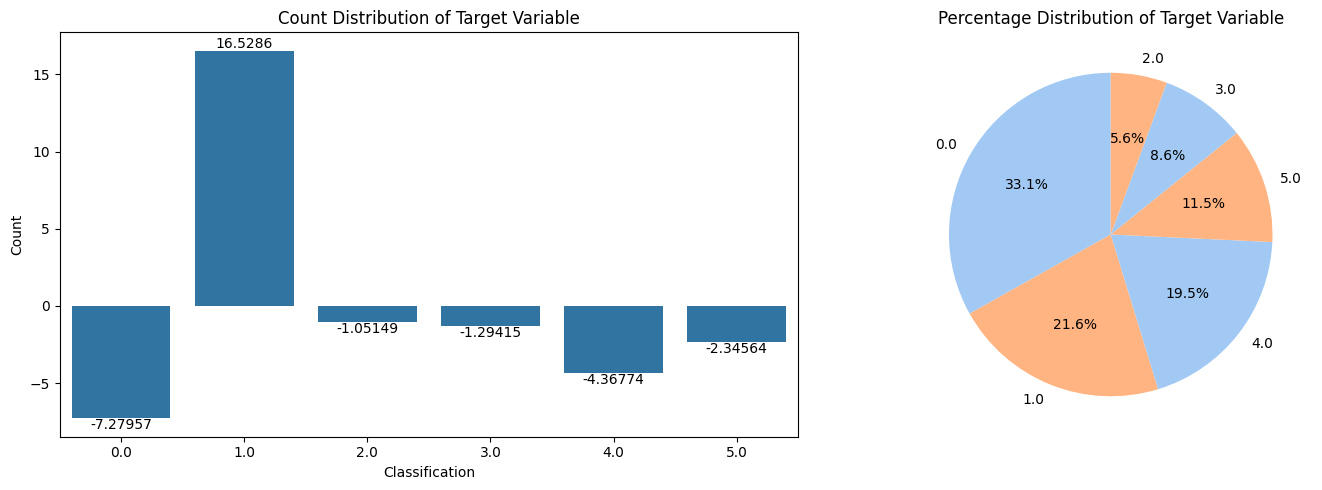

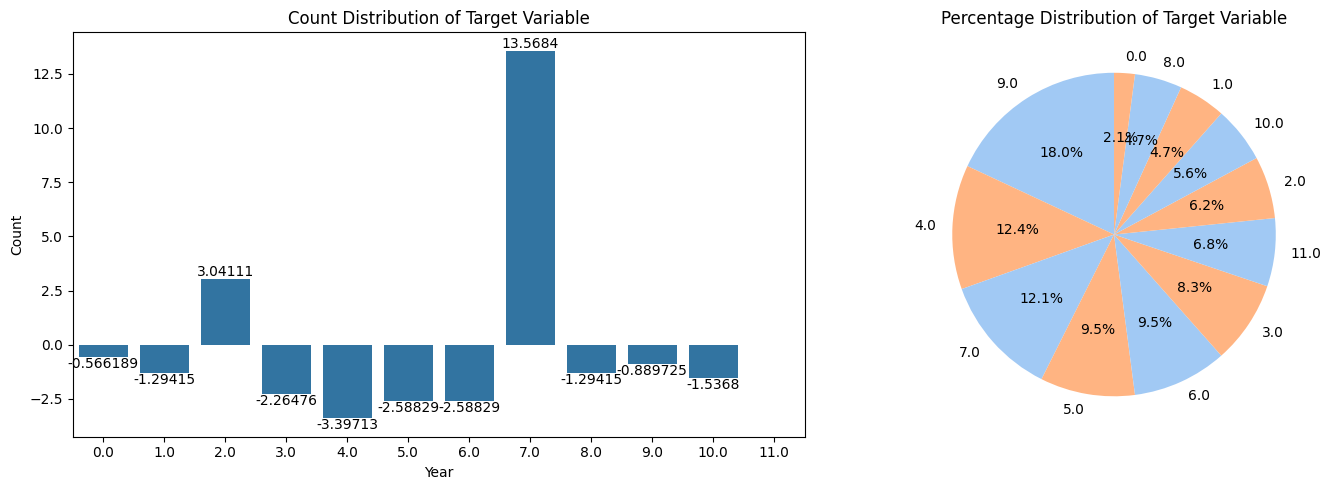

1
Not enough samples for SMOTE. Returning original data


In [315]:
from imblearn.over_sampling import SMOTE

#var_thresh = 40/X_train.shape[0]
#Column that will execute the feature selection...
#Y_TRAIN has 2 Columns. I want to COMBINE these!
y_train['combined'] = y_train['Classification'].astype(str) + ' ' + y_train['Year'].astype(str)

label_encoder_combined = LabelEncoder()
y_train['combined'] = label_encoder_combined.fit_transform(y_train['combined'])


target_column = 'combined'
X_train, X_test, y_train_selected = select_important_features(
    X_train, y_train[target_column], X_test,
    corr_class_thresh=0.05, corr_thresh=1,
    num_columns=int(X_train.shape[1])
)

X_train,y_train = create_smote(X_train, y_train)

if 'combined' in y_train.columns:
  y_train = y_train.drop('combined', axis=1)

y_train_class = y_train["Classification"]
y_train = y_train["Year"]
y_test_class = y_test["Classification"]
y_test = y_test["Year"]

##FUNCTION FOR GRID SEARCH CV

SMOTE

In [316]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
count,3.380000e+02,338.000000,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,...,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,338.000000,3.380000e+02,3.380000e+02,3.380000e+02
mean,-3.678846e-17,0.000000,-3.416071e-17,-2.627747e-17,-5.255494e-18,-2.627747e-17,-1.576648e-17,-1.576648e-17,-1.051099e-17,-5.781043e-17,...,-1.576648e-17,-5.255494e-18,-1.051099e-17,-1.576648e-17,-1.576648e-17,1.576648e-17,0.000000,1.051099e-17,-1.576648e-17,1.576648e-17
std,1.001483e+00,1.001483,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,...,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483,1.001483e+00,1.001483e+00,1.001483e+00
min,-9.463204e-02,-0.080884,-7.571271e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-7.627356e-02,-6.885172e-02,...,-7.469174e-02,-7.698698e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-7.715167e-02,-0.054473,-7.590570e-02,-5.447347e-02,-7.715167e-02
25%,-9.463204e-02,-0.080884,-7.571271e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-7.627356e-02,-6.885172e-02,...,-7.469174e-02,-7.698698e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-7.715167e-02,-0.054473,-7.590570e-02,-5.447347e-02,-7.715167e-02
50%,-9.463204e-02,-0.080884,-7.571271e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-7.627356e-02,-6.885172e-02,...,-7.469174e-02,-7.698698e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-7.715167e-02,-0.054473,-7.590570e-02,-5.447347e-02,-7.715167e-02
75%,-9.463204e-02,-0.080884,-7.571271e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-7.627356e-02,-6.885172e-02,...,-7.469174e-02,-7.698698e-02,-5.447347e-02,-5.447347e-02,-5.447347e-02,-7.715167e-02,-0.054473,-7.590570e-02,-5.447347e-02,-7.715167e-02
max,1.056724e+01,16.803754,1.521879e+01,1.835756e+01,1.835756e+01,1.835756e+01,1.835756e+01,1.835756e+01,1.476975e+01,1.743276e+01,...,1.580476e+01,1.378280e+01,1.835756e+01,1.835756e+01,1.835756e+01,1.296148e+01,18.357560,1.507907e+01,1.835756e+01,1.296148e+01


In [317]:
y_test_class.unique()

array([4, 3, 0, 5, 1, 2])

In [318]:
from sklearn.model_selection import GridSearchCV

def hyperTune(x_train, y_train, modelType, classifier, classifier_type):    # Hyperparameter grids for models
    param_grids_tuning = {
        "Logistic Regression": {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs'],
            'multi_class': ['multinomial'],
            'class_weight': ['balanced']
        },
        "Random Forest": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        },
           "XGBoost": {
            'n_estimators': [100, 200, 300],
            'max_depth': [3,5,7],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8,1.0]
        },
          "Linear Regression": {
            'fit_intercept': [True, False]
        },
          "Ridge Regression": {
            'alpha': [0.01, 0.1, 1, 10, 100],
            'fit_intercept': [True, False],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
        }
    }

    min_class_count = min(min(Counter(y_train).values()),5)

    param_grid = param_grids_tuning[modelType]

    if classifier_type == "Classification":
      ## Perform Grid Search
      grid_search = GridSearchCV(classifier, param_grid, cv=min_class_count, scoring='accuracy')
      grid_search.fit(x_train, y_train)

      # Print the best parameters
      best_params = grid_search.best_params_
      print(f"Best Parameters for {modelType}:", best_params)

      return best_params

    ## Perform Grid Search
    grid_search = GridSearchCV(classifier, param_grid, cv=min_class_count, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    # Print the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for {modelType}:", best_params)

    return best_params

##RUNNING THE MODELS!
- We use: Logistic Regression, Random Forest, XGBoost for classification, linear for regression, tensor for both!

###LINEAR REGRESSION

##Logistic Regression

BEFORE AND AFTER changing the festure selection this performs MUCH MUCH better

Best Parameters for Linear Regression: {'fit_intercept': True}
Mean Absolute Error: 2.1381
Mean Squared Error: 6.9097
Root Mean Squared Error: 2.6286
R² Score: 0.1404
Cross-Validated R² Score: -0.4475 (+/- 0.6444)


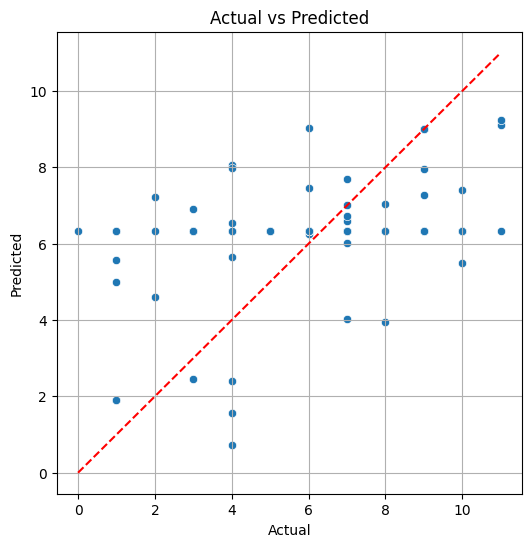

Mean Absolute Error: 2.3046
Mean Squared Error: 9.8369
Root Mean Squared Error: 3.1364
R² Score: -0.2238
Cross-Validated R² Score: -1.0157 (+/- 1.0324)


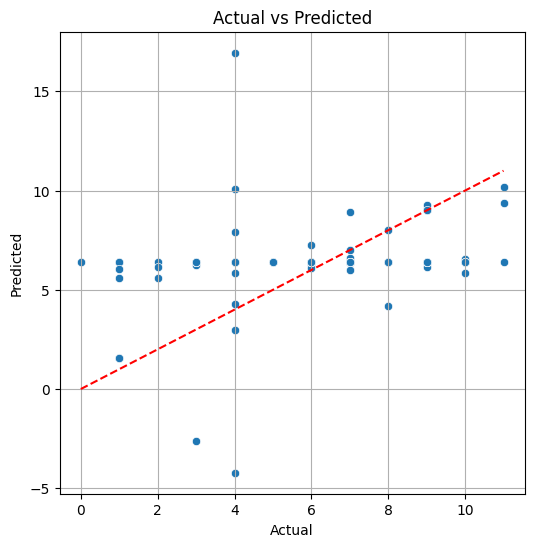

In [319]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Initialize Linear Regression
classifierLR = LinearRegression()
best_params = hyperTune(X_train, y_train, "Linear Regression", classifierLR, "Regression")

# Step 2: Train the model with the best parameters
best_LR = LinearRegression(**best_params)

#FIND Accuracies for Year and Classification SEPERATELY
mae, mse, r2 = regression_model_evaluation(best_LR, X_train, y_train, X_test, y_test)

# Degree 2 adds squares and interaction terms
model_make = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(**best_params))
mae, mse, r2 = regression_model_evaluation(model_make, X_train, y_train, X_test, y_test)


#Ridge Regression
- The Linear regression is not fitting well, worse than just guessing mean. Lts try rideg!

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters for Ridge Regression: {'alpha': 100, 'fit_intercept': True, 'solver': 'saga'}
Mean Absolute Error: 2.0153
Mean Squared Error: 6.2913
Root Mean Squared Error: 2.5083
R² Score: 0.2173
Cross-Validated R² Score: 0.1330 (+/- 0.1121)


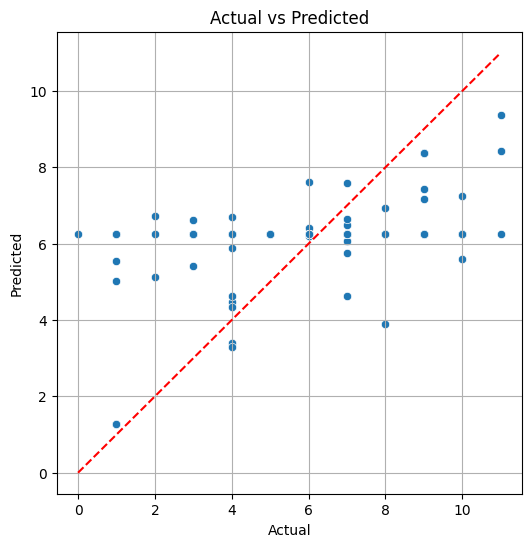

In [320]:
from sklearn.linear_model import Ridge

classifierRR = Ridge(alpha=1.0)
best_params = hyperTune(X_train, y_train, "Ridge Regression", classifierRR, "Regression")

# Step 2: Train the model with the best parameters
best_RR = Ridge(**best_params)

#FIND Accuracies for Year and Classification SEPERATELY
mae, mse, r2 = regression_model_evaluation(best_RR, X_train, y_train, X_test, y_test)

##Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best Parameters for Logistic Regression: {'C': 100, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3


=== Cross-Validated AUC Scores per Class ===
BPD                           : AUC = nan
DSM                           : AUC = nan
Five-Factor Model/Big-Five    : AUC = nan
Other                         : AUC = nan
antisocial                    : AUC = nan
avoidant personality          : AUC = nan

=== Cross-Validated Accuracy Scores per Class ===
BPD                           : Accuracy = nan
DSM                           : Accuracy = nan
Five-Factor Model/Big-Five    : Accuracy = nan
Other                         : Accuracy = nan
antisocial                    : Accuracy = nan
avoidant personality          : Accuracy = nan


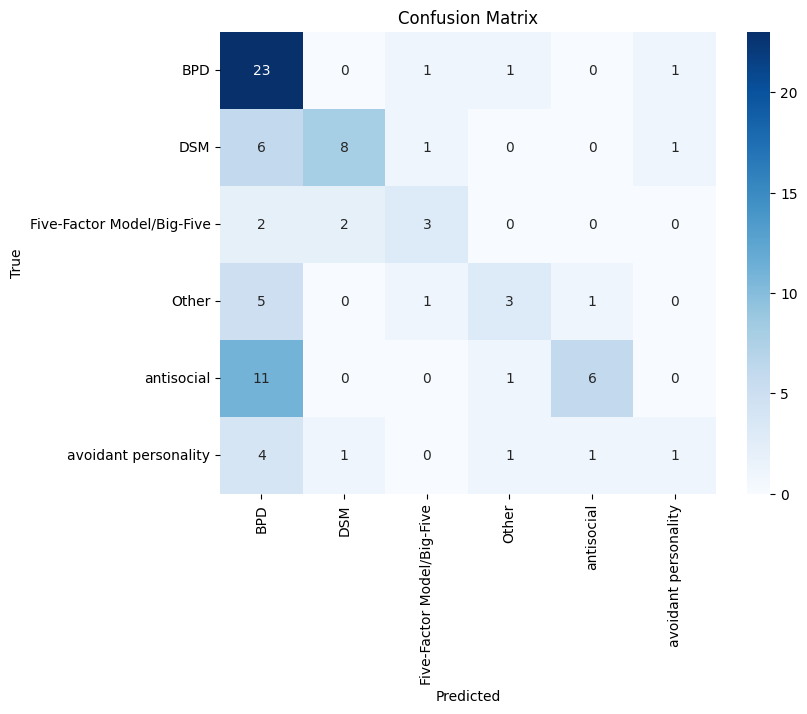


Classification Report:

                            precision    recall  f1-score   support

                       BPD       0.45      0.88      0.60        26
                       DSM       0.73      0.50      0.59        16
Five-Factor Model/Big-Five       0.50      0.43      0.46         7
                     Other       0.50      0.30      0.38        10
                antisocial       0.75      0.33      0.46        18
      avoidant personality       0.33      0.12      0.18         8

                  accuracy                           0.52        85
                 macro avg       0.54      0.43      0.44        85
              weighted avg       0.57      0.52      0.49        85



In [321]:
from sklearn.linear_model import LogisticRegression

n_classes = len(np.unique(y_train_class))

# Initialize Logistic Regression
classifierLR = LogisticRegression(random_state=42)
best_params = hyperTune(X_train, y_train_class, "Logistic Regression", classifierLR, "Classification")

# Step 2: Train the model with the best parameters
best_LR = LogisticRegression(**best_params, random_state=42, max_iter = 5000)

#FIND Accuracies for Classification SEPERATELY
actual_classes = np.unique(np.concatenate([y_train_class, y_test_class]))
results_LR = model(best_LR, X_train, y_train_class, X_test, y_test_class, le.inverse_transform(actual_classes))
model_evaluation(best_LR, X_train, y_train_class, X_test, y_test_class, target = le.classes_)




##XGBoost

Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3


=== Cross-Validated AUC Scores per Class ===
BPD                           : AUC = nan
DSM                           : AUC = nan
Five-Factor Model/Big-Five    : AUC = nan
Other                         : AUC = nan
antisocial                    : AUC = nan
avoidant personality          : AUC = nan

=== Cross-Validated Accuracy Scores per Class ===
BPD                           : Accuracy = nan
DSM                           : Accuracy = nan
Five-Factor Model/Big-Five    : Accuracy = nan
Other                         : Accuracy = nan
antisocial                    : Accuracy = nan
avoidant personality          : Accuracy = nan


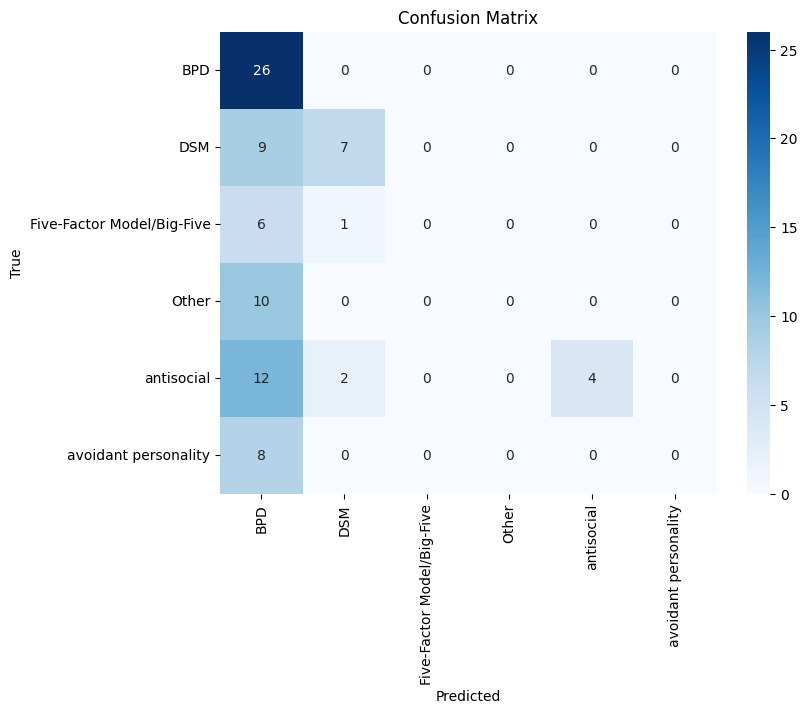


Classification Report:

                            precision    recall  f1-score   support

                       BPD       0.37      1.00      0.54        26
                       DSM       0.70      0.44      0.54        16
Five-Factor Model/Big-Five       0.00      0.00      0.00         7
                     Other       0.00      0.00      0.00        10
                antisocial       1.00      0.22      0.36        18
      avoidant personality       0.00      0.00      0.00         8

                  accuracy                           0.44        85
                 macro avg       0.34      0.28      0.24        85
              weighted avg       0.46      0.44      0.34        85



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [322]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
classifierXG = XGBClassifier(random_state=1)
best_params = hyperTune(X_train, y_train_class, "XGBoost", classifierXG, "Classification")

# Step 2: Train the model with the best parameters
best_XG = XGBClassifier(**best_params, random_state=42)
#FIND Accuracies for Year and Classification SEPERATELY

#FIND Accuracies for Classification SEPERATELY
actual_classes = np.unique(np.concatenate([y_train_class, y_test_class]))
result = model(best_XG, X_train, y_train_class, X_test, y_test_class, le.inverse_transform(actual_classes))
model_evaluation(best_XG, X_train, y_train_class, X_test, y_test_class, target = le.classes_)

##Random Forest

Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3


=== Cross-Validated AUC Scores per Class ===
BPD                           : AUC = nan
DSM                           : AUC = nan
Five-Factor Model/Big-Five    : AUC = nan
Other                         : AUC = nan
antisocial                    : AUC = nan
avoidant personality          : AUC = nan

=== Cross-Validated Accuracy Scores per Class ===
BPD                           : Accuracy = nan
DSM                           : Accuracy = nan
Five-Factor Model/Big-Five    : Accuracy = nan
Other                         : Accuracy = nan
antisocial                    : Accuracy = nan
avoidant personality          : Accuracy = nan


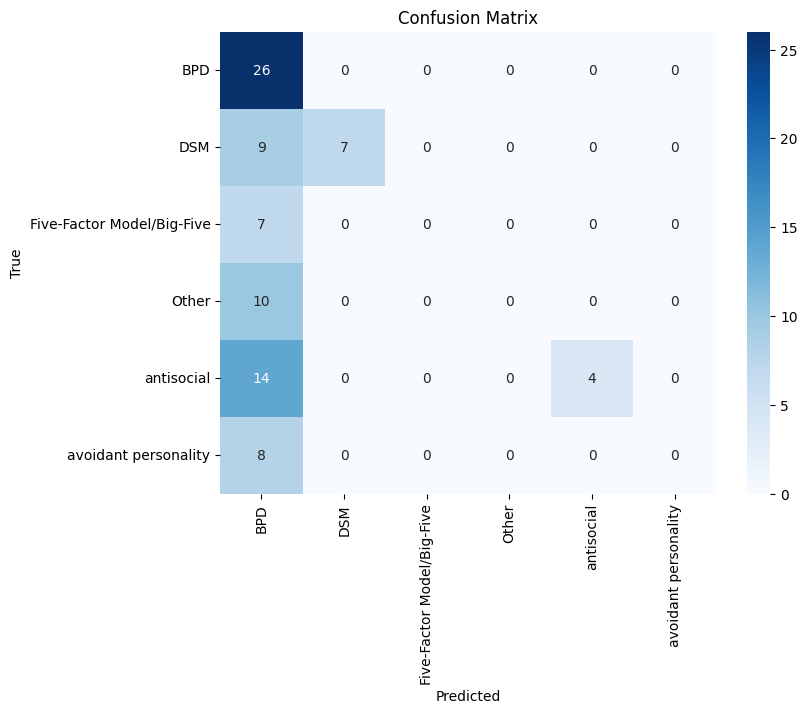


Classification Report:

                            precision    recall  f1-score   support

                       BPD       0.35      1.00      0.52        26
                       DSM       1.00      0.44      0.61        16
Five-Factor Model/Big-Five       0.00      0.00      0.00         7
                     Other       0.00      0.00      0.00        10
                antisocial       1.00      0.22      0.36        18
      avoidant personality       0.00      0.00      0.00         8

                  accuracy                           0.44        85
                 macro avg       0.39      0.28      0.25        85
              weighted avg       0.51      0.44      0.35        85



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [323]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Logistic Regression
classifierRF = RandomForestClassifier(random_state=42)
best_params = hyperTune(X_train, y_train_class, "Random Forest", classifierRF,"Classificaion")

# Step 2: Train the model with the best parameters
best_RF = RandomForestClassifier(**best_params, random_state=42)

result = model(best_RF, X_train, y_train_class, X_test, y_test_class, le.inverse_transform(actual_classes))
model_evaluation(best_RF, X_train, y_train_class, X_test, y_test_class, target = le.classes_)

##NEAURAL NETWORK

In [324]:
pip install tensorflow

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - Classification_accuracy: 0.1806 - Classification_loss: 2.4187 - Year_loss: 44.5751 - Year_mae: 5.9507 - loss: 47.1365 - val_Classification_accuracy: 0.3412 - val_Classification_loss: 1.7420 - val_Year_loss: 42.1961 - val_Year_mae: 6.0867 - val_loss: 46.3234
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - Classification_accuracy: 0.1993 - Classification_loss: 2.5420 - Year_loss: 38.9499 - Year_mae: 5.5474 - loss: 41.5207 - val_Classification_accuracy: 0.3882 - val_Classification_loss: 1.6768 - val_Year_loss: 36.8849 - val_Year_mae: 5.6567 - val_loss: 40.8584
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - Classification_accuracy: 0.3189 - Classification_loss: 2.0270 - Year_loss: 36.8830 - Year_mae: 5.3835 - loss: 38.9225 - val_Classification_accuracy: 0.4235 - val_Classification_loss: 1.6204 - val_Year_loss: 32.7193 - val_Year_mae: 5.2919 - val_loss: 36.3363
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - Classific

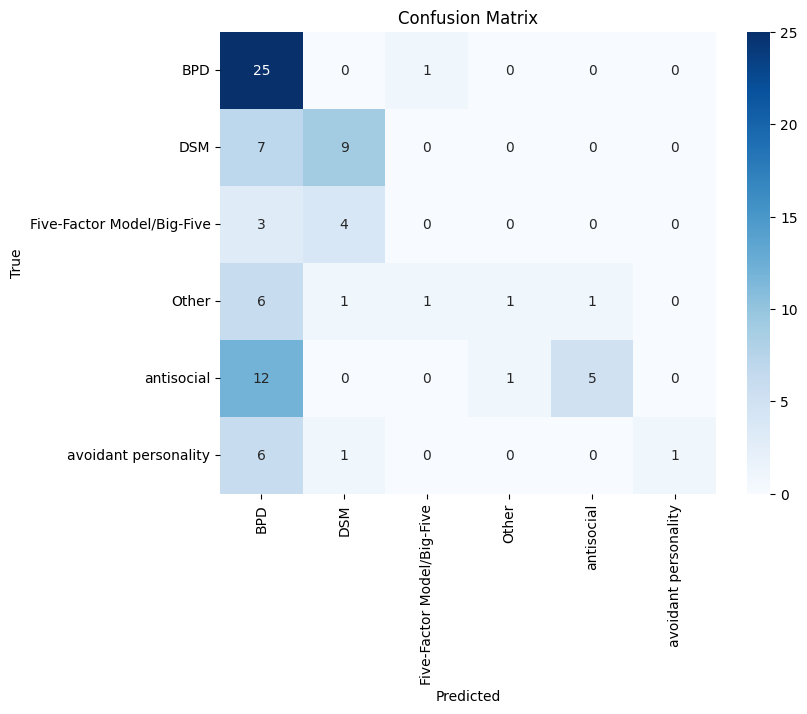


Classification Report:

                            precision    recall  f1-score   support

                       BPD       0.42      0.96      0.59        26
                       DSM       0.60      0.56      0.58        16
Five-Factor Model/Big-Five       0.00      0.00      0.00         7
                     Other       0.50      0.10      0.17        10
                antisocial       0.83      0.28      0.42        18
      avoidant personality       1.00      0.12      0.22         8

                  accuracy                           0.48        85
                 macro avg       0.56      0.34      0.33        85
              weighted avg       0.57      0.48      0.42        85

Classification Accuracy: 0.4823529411764706
Regression MAE: 1.9749234914779663


In [325]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

# Input layer
input_layer = Input(shape=(X_train.shape[1],))

#Shared hidden layers
x = Dense(256, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# x = Dense(64, activation='relu')(input_layer)
# x = Dropout(0.5)(x)

# Classification head
class_output = Dense(len(np.unique(y_train_class)), activation='softmax', name='Classification')(x)

# Regression head
regression_output = Dense(1, name='Year')(x)

# Model definition
model = Model(inputs=input_layer, outputs=[class_output, regression_output])

# Compile
model.compile(
    optimizer='adam',
    loss={
        'Classification': 'sparse_categorical_crossentropy',
        'Year': 'mse'
    },
    metrics={
        'Classification': 'accuracy',
        'Year': 'mae'
    }
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Training
model.fit(X_train,
          {'Classification': y_train_class, 'Year': y_train},
          validation_data=(X_test, {'Classification': y_test_class, 'Year': y_test}),
          epochs=200,
          batch_size=16,
          callbacks = [early_stop])

# Evaluate the model
classification_predictions, regression_predictions = model.predict(X_test)
# Convert classification predictions to class labels
classification_predictions = np.argmax(classification_predictions, axis=1) #This gets the index of the highest probability

cm = confusion_matrix(y_test_class, classification_predictions)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.inverse_transform(actual_classes), yticklabels=le.inverse_transform(actual_classes))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_class, classification_predictions, target_names=le.inverse_transform(actual_classes)))


classification_accuracy = accuracy_score(y_test_class, classification_predictions)
regression_mae = mean_absolute_error(y_test, regression_predictions)

print(f"Classification Accuracy: {classification_accuracy}")
print(f"Regression MAE: {regression_mae}")


In [326]:
pip install keras-tuner

#COMBINE PREDICTIONS

##Neural Network

In [330]:
import pandas as pd

results_df = pd.DataFrame({
    'True_Class': le.inverse_transform(y_test_class),
    'Predicted_Class': le.inverse_transform(classification_predictions),
    'True_Year': y_test,
    'Predicted_Year': regression_predictions.flatten().astype(int)
})

# Create combined labels using columns from the dataframe
y_true_combined = results_df['True_Class'].astype(str) + "_" + results_df['True_Year'].astype(str)
y_pred_combined = results_df['Predicted_Class'].astype(str) + "_" + results_df['Predicted_Year'].astype(int).astype(str)

# Generate classification report
report = classification_report(y_true_combined, y_pred_combined)
print(report)

# Optional: Check a few rows
print(results_df.head())

                               precision    recall  f1-score   support

                        BPD_0       0.00      0.00      0.00         1
                       BPD_10       0.00      0.00      0.00         3
                        BPD_2       0.00      0.00      0.00         3
                        BPD_3       0.00      0.00      0.00         3
                        BPD_4       0.00      0.00      0.00         1
                        BPD_5       0.00      0.00      0.00         4
                        BPD_6       0.04      1.00      0.07         2
                        BPD_7       0.00      0.00      0.00         3
                        BPD_8       0.00      0.00      0.00         3
                        BPD_9       0.00      0.00      0.00         3
                       DSM_10       0.00      0.00      0.00         1
                       DSM_11       0.00      0.00      0.00         1
                        DSM_3       0.00      0.00      0.00         0
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

##Logistic Regression and Neural Network

In [329]:
import pandas as pd

results_df = pd.DataFrame({
    'True_Class': le.inverse_transform(y_test_class),
    'Predicted_Class': le.inverse_transform(results_LR['final_predictions']),
    'True_Year': y_test,
    'Predicted_Year': regression_predictions.flatten().astype(int)
})

# Create combined labels using columns from the dataframe
y_true_combined = results_df['True_Class'].astype(str) + "_" + results_df['True_Year'].astype(str)
y_pred_combined = results_df['Predicted_Class'].astype(str) + "_" + results_df['Predicted_Year'].astype(int).astype(str)

# Generate classification report
report = classification_report(y_true_combined, y_pred_combined)
print(report)

# Optional: Check a few rows
print(results_df.head())

                               precision    recall  f1-score   support

                        BPD_0       0.00      0.00      0.00         1
                       BPD_10       0.00      0.00      0.00         3
                        BPD_2       0.00      0.00      0.00         3
                        BPD_3       0.00      0.00      0.00         3
                        BPD_4       0.00      0.00      0.00         1
                        BPD_5       0.00      0.00      0.00         4
                        BPD_6       0.04      1.00      0.08         2
                        BPD_7       0.00      0.00      0.00         3
                        BPD_8       0.00      0.00      0.00         3
                        BPD_9       0.00      0.00      0.00         3
                       DSM_10       0.00      0.00      0.00         1
                       DSM_11       0.00      0.00      0.00         1
                        DSM_3       0.00      0.00      0.00         0
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_